In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
pd.set_option('display.max_columns', None)
PATH_DATA_RAW= '../Data/Raw/'
PATH_DATA_CLEAN = '../Data/Clean/'

In [9]:
df = pd.read_csv(PATH_DATA_CLEAN+'train_clean.csv')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
35414,"Las Vegas Marriott Las Vegas, NV",1,28,2017,November,45,2,1,5,2,0,0,BB,PRT,Online TA,TA/TO,0,1,0,A,A,0,No Deposit,9,0,Contract,90.95,0,0,Canceled,2017-10-16,35685
49887,Newark Liberty International Airport Courtyard...,0,54,2018,May,20,9,1,2,2,0,0,BB,ESP,Offline TA/TO,TA/TO,0,0,0,A,C,0,No Deposit,95,0,Transient,41.40,0,1,Check-Out,2018-05-12,50264
64906,Spokane Downtown at the Convention Center Cour...,1,310,2018,September,40,25,4,10,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,E,E,0,No Deposit,75,0,Contract,76.50,0,0,Canceled,2018-08-18,65404
81762,"Crystal Cove, Barbados Barbados",0,162,2018,October,41,4,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,C,1,No Deposit,242,0,Transient,67.57,0,1,Check-Out,2018-10-11,82378
68695,Cape Town Marriott Hotel Crystal Towers Cape T...,1,105,2018,October,42,12,0,3,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,132,0,Transient-Party,75.00,0,0,Canceled,2018-10-03,69217


In [10]:
# Changing reservation status date to datetime type: 
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82665 entries, 0 to 82664
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           82665 non-null  object        
 1   is_canceled                     82665 non-null  int64         
 2   lead_time                       82665 non-null  int64         
 3   arrival_date_year               82665 non-null  int64         
 4   arrival_date_month              82665 non-null  object        
 5   arrival_date_week_number        82665 non-null  int64         
 6   arrival_date_day_of_month       82665 non-null  int64         
 7   stays_in_weekend_nights         82665 non-null  int64         
 8   stays_in_week_nights            82665 non-null  int64         
 9   adults                          82665 non-null  int64         
 10  children                        82665 non-null  int64         
 11  ba

## Feature Engineering 1

### 1. Total Stays
From the `stays_in_weekend_nights` and `stays_in_week_nights` columns, we can get the total number of days of stay

In [11]:
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID,total_stays
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314,0,Transient,38.40,0,0,Check-Out,2019-01-14,1,4
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1,0,Transient,62.80,0,0,Canceled,2017-10-21,2,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,12,0,Transient,110.00,0,0,Canceled,2018-11-25,3,3
3,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,16,0,Transient,57.92,0,1,Canceled,2017-08-24,5,5
4,"Hotel Maria Cristina, San Sebastian San Sebast...",1,395,2018,March,13,21,1,2,2,0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,1,0,Transient,62.80,0,0,Canceled,2017-08-10,6,3


### 2. Total Guests
From the `adults`, `children` and `babies` columns, we can get information on the total number of people staying overnight

In [12]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID,total_stays,total_guests
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314,0,Transient,38.40,0,0,Check-Out,2019-01-14,1,4,2
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1,0,Transient,62.80,0,0,Canceled,2017-10-21,2,2,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,12,0,Transient,110.00,0,0,Canceled,2018-11-25,3,3,2
3,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,16,0,Transient,57.92,0,1,Canceled,2017-08-24,5,5,2
4,"Hotel Maria Cristina, San Sebastian San Sebast...",1,395,2018,March,13,21,1,2,2,0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,1,0,Transient,62.80,0,0,Canceled,2017-08-10,6,3,2


### 3. Total Kids

From most booking sites, usually there are only guest and child categories (under 17 years old), so we can combine the values of `children` and `babies` into the `kids` column

In [13]:
df['kids'] = df['children'] + df['babies']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID,total_stays,total_guests,kids
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314,0,Transient,38.40,0,0,Check-Out,2019-01-14,1,4,2,0
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1,0,Transient,62.80,0,0,Canceled,2017-10-21,2,2,2,0
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,12,0,Transient,110.00,0,0,Canceled,2018-11-25,3,3,2,0
3,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,16,0,Transient,57.92,0,1,Canceled,2017-08-24,5,5,2,0
4,"Hotel Maria Cristina, San Sebastian San Sebast...",1,395,2018,March,13,21,1,2,2,0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,1,0,Transient,62.80,0,0,Canceled,2017-08-10,6,3,2,0


### 4. Redefined Agent Colomn

Karena sebelumnya ada missing value pada kolom agent dan diisi dengan 0 yang mana diasumsikan bahwa pemesanan hotel tidak melalui agent maka kolom agent akan didefinisikan ulang. Kolom agent yang nilainya != 0 akan diubah menjadi 1 (pemesanan hotel melalui agent) dan jika nilainya 0 maka nilainya tetap.

In [14]:
df['agent'] = np.where(df['agent']==0,0,1)
df['agent'].value_counts()

agent
1    71542
0    11123
Name: count, dtype: int64

### 5. Guest Location

Because the number of `country` values is very large in this dataset, we will condense the values to *Local* or *International*

In [15]:
df['country'].value_counts()

country
PRT    33836
GBR     8369
FRA     7217
ESP     5879
DEU     5095
       ...  
MRT        1
BRB        1
NPL        1
DJI        1
NAM        1
Name: count, Length: 165, dtype: int64

In [16]:
df['country'].value_counts()/df.shape[0]

country
PRT    0.409315
GBR    0.101240
FRA    0.087304
ESP    0.071118
DEU    0.061634
         ...   
MRT    0.000012
BRB    0.000012
NPL    0.000012
DJI    0.000012
NAM    0.000012
Name: count, Length: 165, dtype: float64

To determine the value based on the following criteria, because this hotel dataset is located in Portugal, customers from Portugal will be set to *Local* and in addition to *International*

In [17]:
df['guest_location'] = df['country'].apply(lambda x: 'Local' if x == 'PRT' else 'International')
df['guest_location'].value_counts()

guest_location
International    48829
Local            33836
Name: count, dtype: int64

### 6. Rasio Permintaan Khusus terhadap Total Tamu

Rasio Permintaan Khusus terhadap Total Tamu adalah suatu metrik yang mencerminkan seberapa intens permintaan khusus (seperti permintaan kamar tertentu, kebutuhan diet khusus, atau permintaan layanan tambahan) dari sejumlah total tamu. Dengan kata lain, ini memberikan gambaran tentang seberapa banyak setiap tamu cenderung membuat permintaan khusus dibandingkan dengan jumlah orang yang terlibat dalam pemesanan tersebut.

In [18]:
df['RateSpecialReq_to_TotalGuest'] = df['total_of_special_requests']/df['total_guests']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID,total_stays,total_guests,kids,guest_location,RateSpecialReq_to_TotalGuest
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,38.40,0,0,Check-Out,2019-01-14,1,4,2,0,International,0.0
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1,0,Transient,62.80,0,0,Canceled,2017-10-21,2,2,2,0,Local,0.0
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1,0,Transient,110.00,0,0,Canceled,2018-11-25,3,3,2,0,Local,0.0
3,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,57.92,0,1,Canceled,2017-08-24,5,5,2,0,Local,0.5
4,"Hotel Maria Cristina, San Sebastian San Sebast...",1,395,2018,March,13,21,1,2,2,0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,1,0,Transient,62.80,0,0,Canceled,2017-08-10,6,3,2,0,Local,0.0


### 7. Rate Cancellation base on Market Segment
mencerminkan rata-rata tingkat pembatalan (cancellation rate) pada Market Segment.

In [19]:
# Hitung rata-rata tingkat pembatalan per market
cancellation_rate_marketSegment = df.groupby('market_segment')['is_canceled'].mean().reset_index()
cancellation_rate_marketSegment.columns = ['market_segment', 'cancelrate_byMarket']
cancellation_rate_marketSegment

,market_segment,cancelrate_byMarket
0,Aviation,0.250000
1,Complementary,0.111984
2,Corporate,0.194188
3,Direct,0.154849
4,Groups,0.607026
5,Offline TA/TO,0.342908
6,Online TA,0.367236


In [20]:
df = pd.merge(df, cancellation_rate_marketSegment, on = 'market_segment', how = 'left')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID,total_stays,total_guests,kids,guest_location,RateSpecialReq_to_TotalGuest,cancelrate_byMarket
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,38.40,0,0,Check-Out,2019-01-14,1,4,2,0,International,0.0,0.367236
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1,0,Transient,62.80,0,0,Canceled,2017-10-21,2,2,2,0,Local,0.0,0.607026
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1,0,Transient,110.00,0,0,Canceled,2018-11-25,3,3,2,0,Local,0.0,0.607026
3,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,57.92,0,1,Canceled,2017-08-24,5,5,2,0,Local,0.5,0.342908
4,"Hotel Maria Cristina, San Sebastian San Sebast...",1,395,2018,March,13,21,1,2,2,0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,1,0,Transient,62.80,0,0,Canceled,2017-08-10,6,3,2,0,Local,0.0,0.607026


## Remove Irrelevant and Redundant Column

In [21]:
df[['hotel','bookingID']].head()

,hotel,bookingID
0,"Crystal Cove, Barbados Barbados",1
1,"Greensboro Courtyard Greensboro, NC",2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",3
3,"W New York – Union Square New York, NY",5
4,"Hotel Maria Cristina, San Sebastian San Sebast...",6


In [22]:
#Delete 'hotel' attributes
df.drop(['hotel','bookingID'], axis = 1, inplace=True)

Column `hotel` and `bookingID` are a column that does not have a pattern, so we can just delete the column

In [23]:
#Delete 'stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'babies' attributes
df.drop(['stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'babies', 'country'], axis = 1, inplace=True)

The `stays_in_weekend_nights` and `stays_in_week_nights` columns are removed because there is already a `total_stays` column <br>
The `children` and `babies` columns were removed because there was already a `kids` column

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82665 entries, 0 to 82664
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   is_canceled                     82665 non-null  int64         
 1   lead_time                       82665 non-null  int64         
 2   arrival_date_year               82665 non-null  int64         
 3   arrival_date_month              82665 non-null  object        
 4   arrival_date_week_number        82665 non-null  int64         
 5   arrival_date_day_of_month       82665 non-null  int64         
 6   adults                          82665 non-null  int64         
 7   meal                            82665 non-null  object        
 8   market_segment                  82665 non-null  object        
 9   distribution_channel            82665 non-null  object        
 10  is_repeated_guest               82665 non-null  int64         
 11  pr

In [25]:
df.to_csv(PATH_DATA_CLEAN+'train_clean1.csv',index = False)

## Redefine Numeric and Categorical Feature

In [26]:
df1 = pd.read_csv(PATH_DATA_CLEAN+'train_clean1.csv')

In [27]:
numerical = []
categorical = []
for i in df1.columns:
    if (df1[i].dtypes == 'float64') or (df1[i].dtypes == 'int64'):
        numerical.append(i)
    elif (df1[i].dtypes != 'float64') and (df1[i].dtypes != 'int64'):
        categorical.append(i)
print(numerical)
print(categorical)

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'adults', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_stays', 'total_guests', 'kids', 'RateSpecialReq_to_TotalGuest', 'cancelrate_byMarket']
['arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 'guest_location']


In [28]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stays,total_guests,kids,RateSpecialReq_to_TotalGuest,cancelrate_byMarket
count,82665.000000,82665.000000,82665.000000,82665.000000,82665.000000,82665.000000,82665.000000,82665.000000,82665.000000,82665.000000,82665.000000,82665.000000,82665.000000,82665.000000,82665.000000,82665.000000,82665.000000,82665.000000,82665.000000,82665.000000
mean,0.370882,104.263824,2018.157830,27.162717,15.784794,1.862602,0.029964,0.087280,0.137071,0.220408,0.865445,2.365148,102.053911,0.061271,0.571245,3.435505,1.971003,0.108401,0.297138,0.370882
std,0.483044,106.948367,0.706848,13.602087,8.775347,0.596952,0.170490,0.866006,1.545262,0.640992,0.341250,17.873179,47.928067,0.244079,0.792935,2.550972,0.741263,0.405786,0.442314,0.126892
min,0.000000,0.000000,2017.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.111984
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,70.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.342908
50%,0.000000,69.000000,2018.000000,27.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,95.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.367236
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,126.000000,0.000000,1.000000,4.000000,2.000000,0.000000,0.500000,0.367236
max,1.000000,737.000000,2019.000000,53.000000,31.000000,55.000000,1.000000,26.000000,70.000000,17.000000,1.000000,391.000000,508.000000,8.000000,5.000000,56.000000,55.000000,10.000000,5.000000,0.607026


In [29]:
df1.describe(include='O')

,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,guest_location
count,82665,82665,82665,82665,82665,82665,82665,82665,82665,82665,82665
unique,12,5,7,5,9,10,3,4,3,914,2
top,August,BB,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-10-21,International
freq,9590,63899,39201,68042,59700,51521,72361,62032,52006,1024,48829


# Exploratory Data Analysis (EDA) 1

## Univariate Analysis

### Boxplot

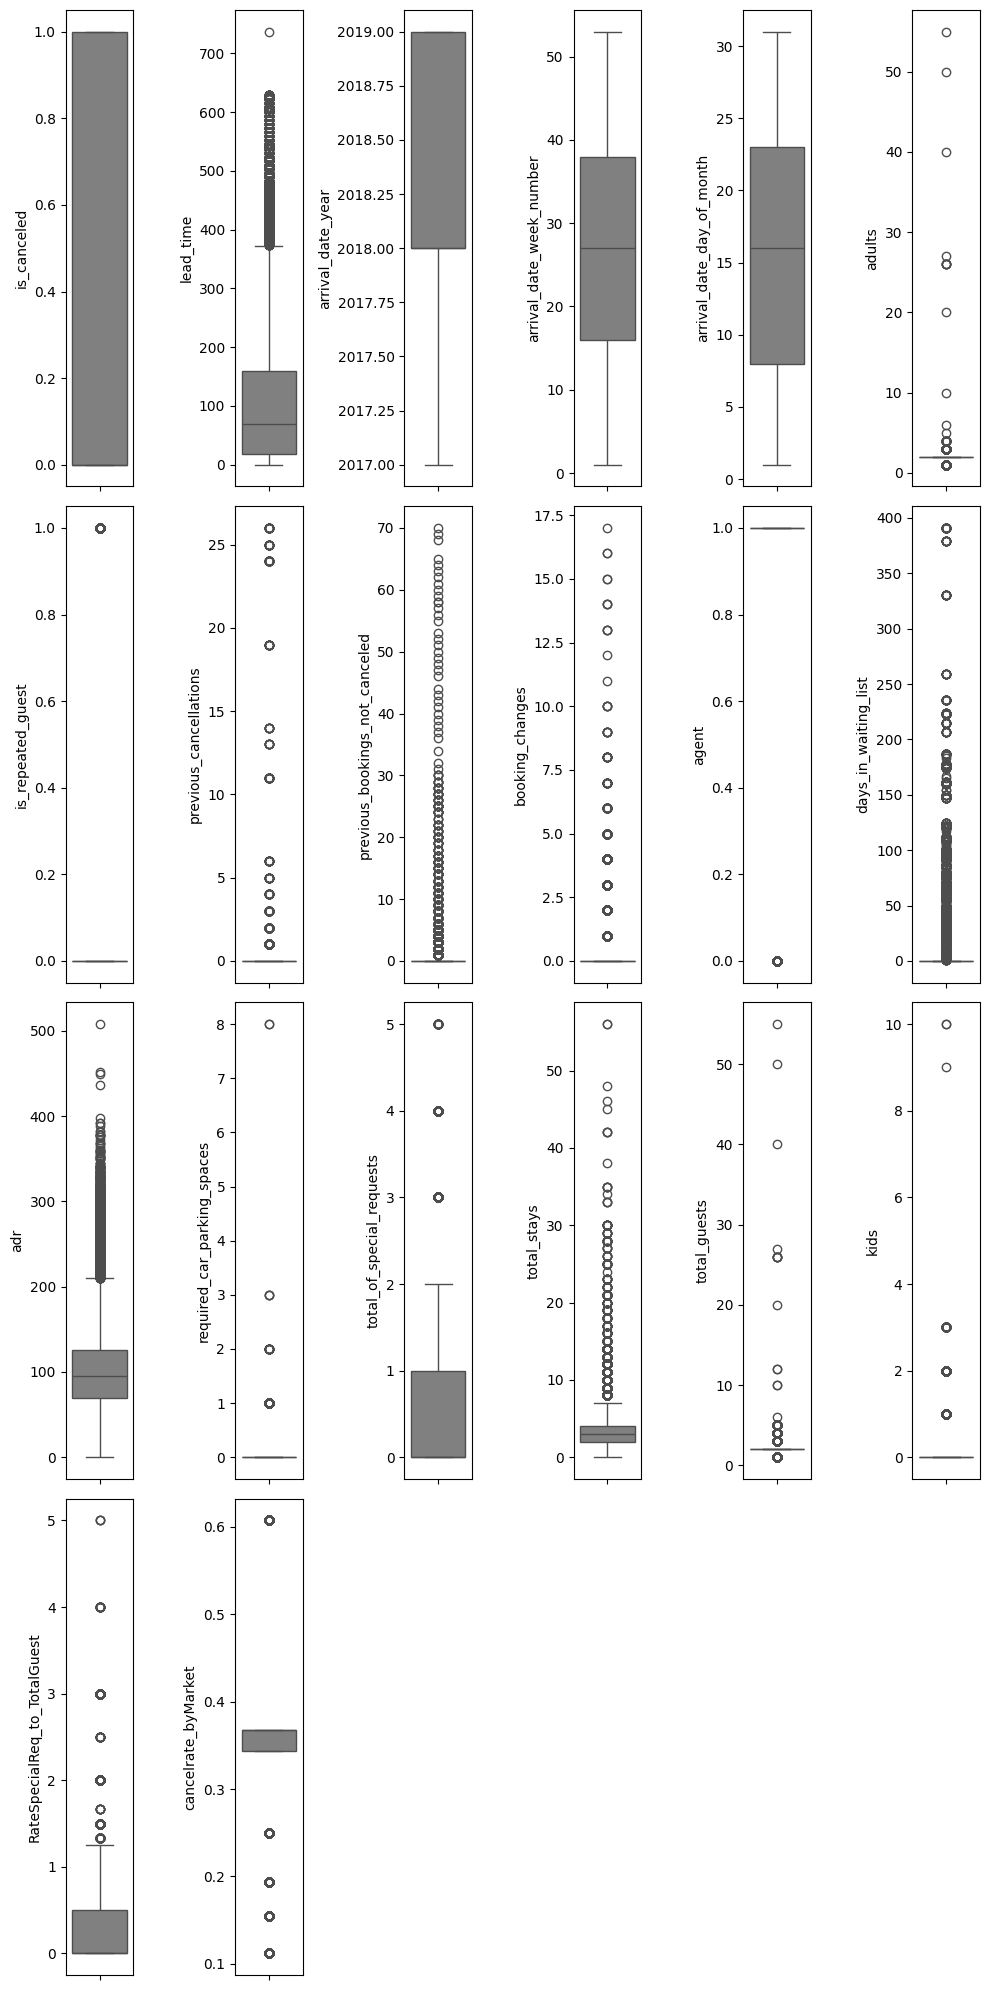

In [30]:
plt.figure(figsize=(10, 20))
for i in range(0, len(numerical)):
    plt.subplot(4, int(len(numerical)/3), i+1)
    sns.boxplot(y=df1[numerical[i]], color='gray', orient='v')
    plt.tight_layout()

From the boxplot visualization, the most important thing we should pay attention to is the presence of outliers:
* The majority of numeric columns still have outlier values. But it looks like these outlier values can provide a lot of useful information, so we're not doing outlier data cleaning, but rather feature engineering or creating new columns and hopefully we can extract more information by doing that
* From the boxplot, it can be seen that the majority of columns have a *skewed* distribution, except for the columns `arrival_date_day_of_month`, `arrival_date_week_number`

### Distribution Plot

C:\Users\ramad\AppData\Local\Temp\ipykernel_24544\1004448407.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[numerical[i]], color='gray')
C:\Users\ramad\AppData\Local\Temp\ipykernel_24544\1004448407.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[numerical[i]], color='gray')
C:\U

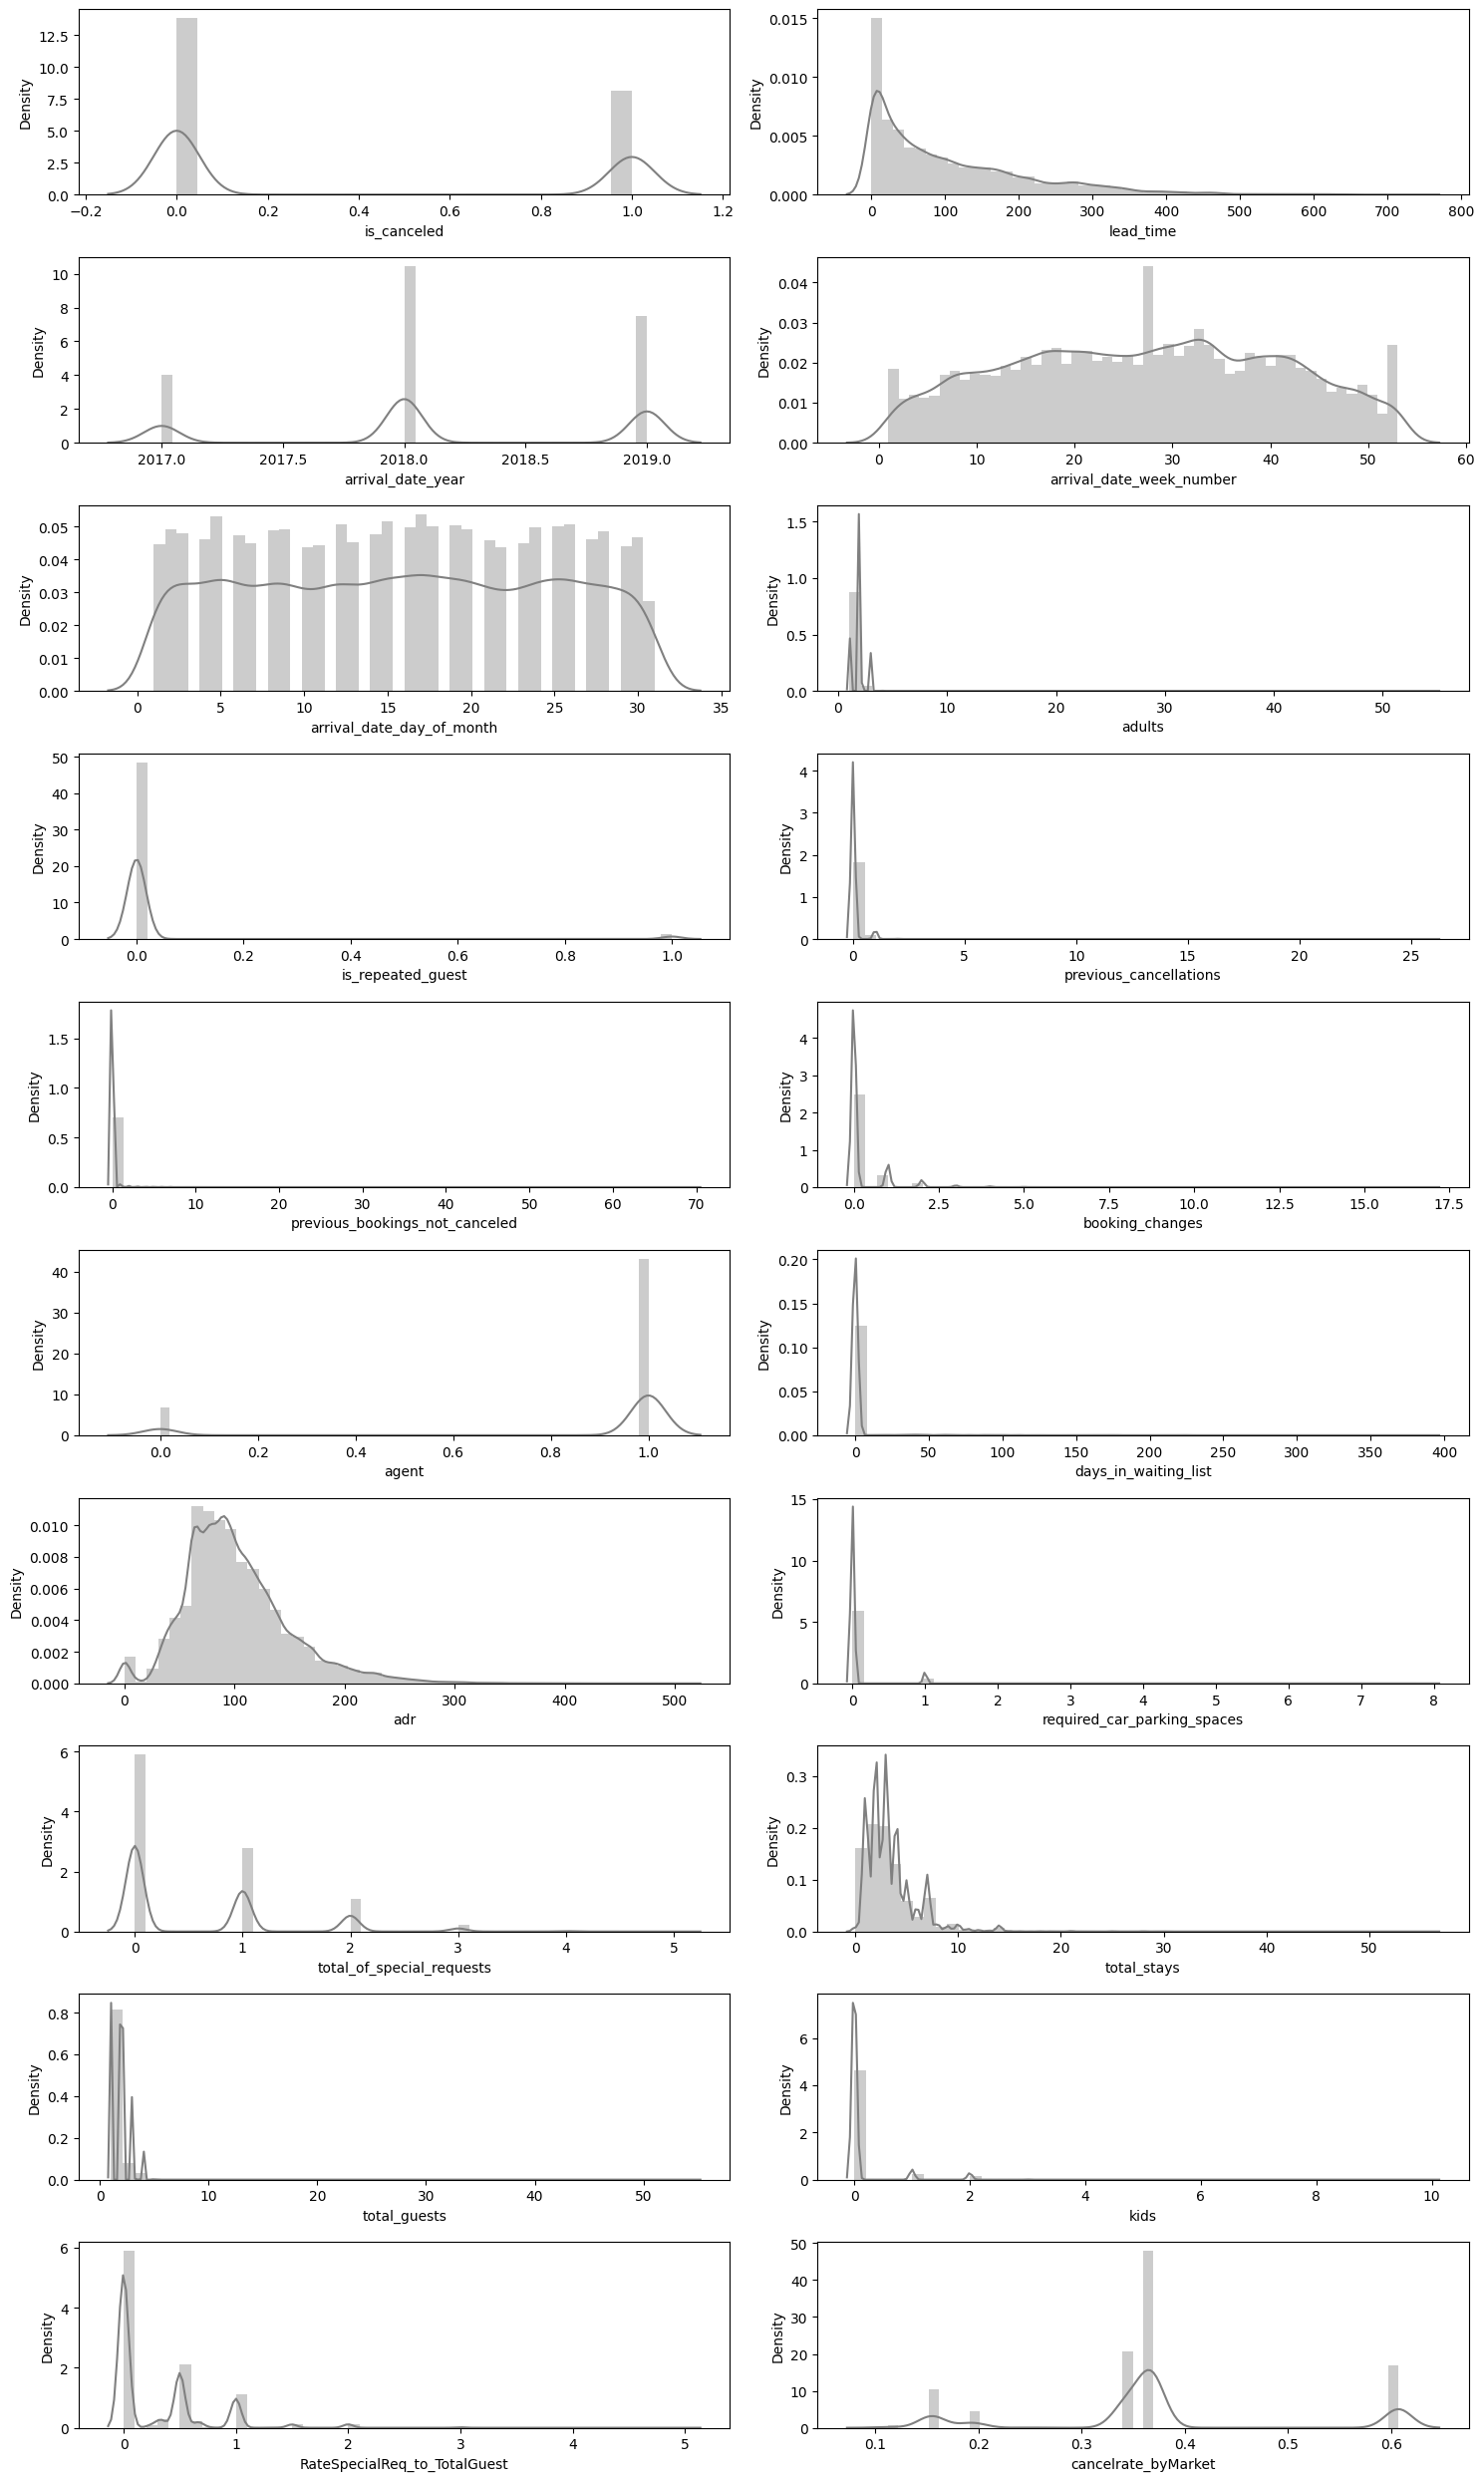

In [31]:
plt.figure(figsize=(15, 25))
for i in range(0, len(numerical)):
    plt.subplot(10, int(len(numerical)/9), i+1)
    sns.distplot(df1[numerical[i]], color='gray')
    plt.tight_layout()
plt.show()

For the *distribution plot*, the main thing to note is the shape of the distribution:
* As we suspected in the *box plot*, most of the columns have a *skewed* distribution
* Means that there is a possibility that we will need to do something with those columns later

### Count Plot

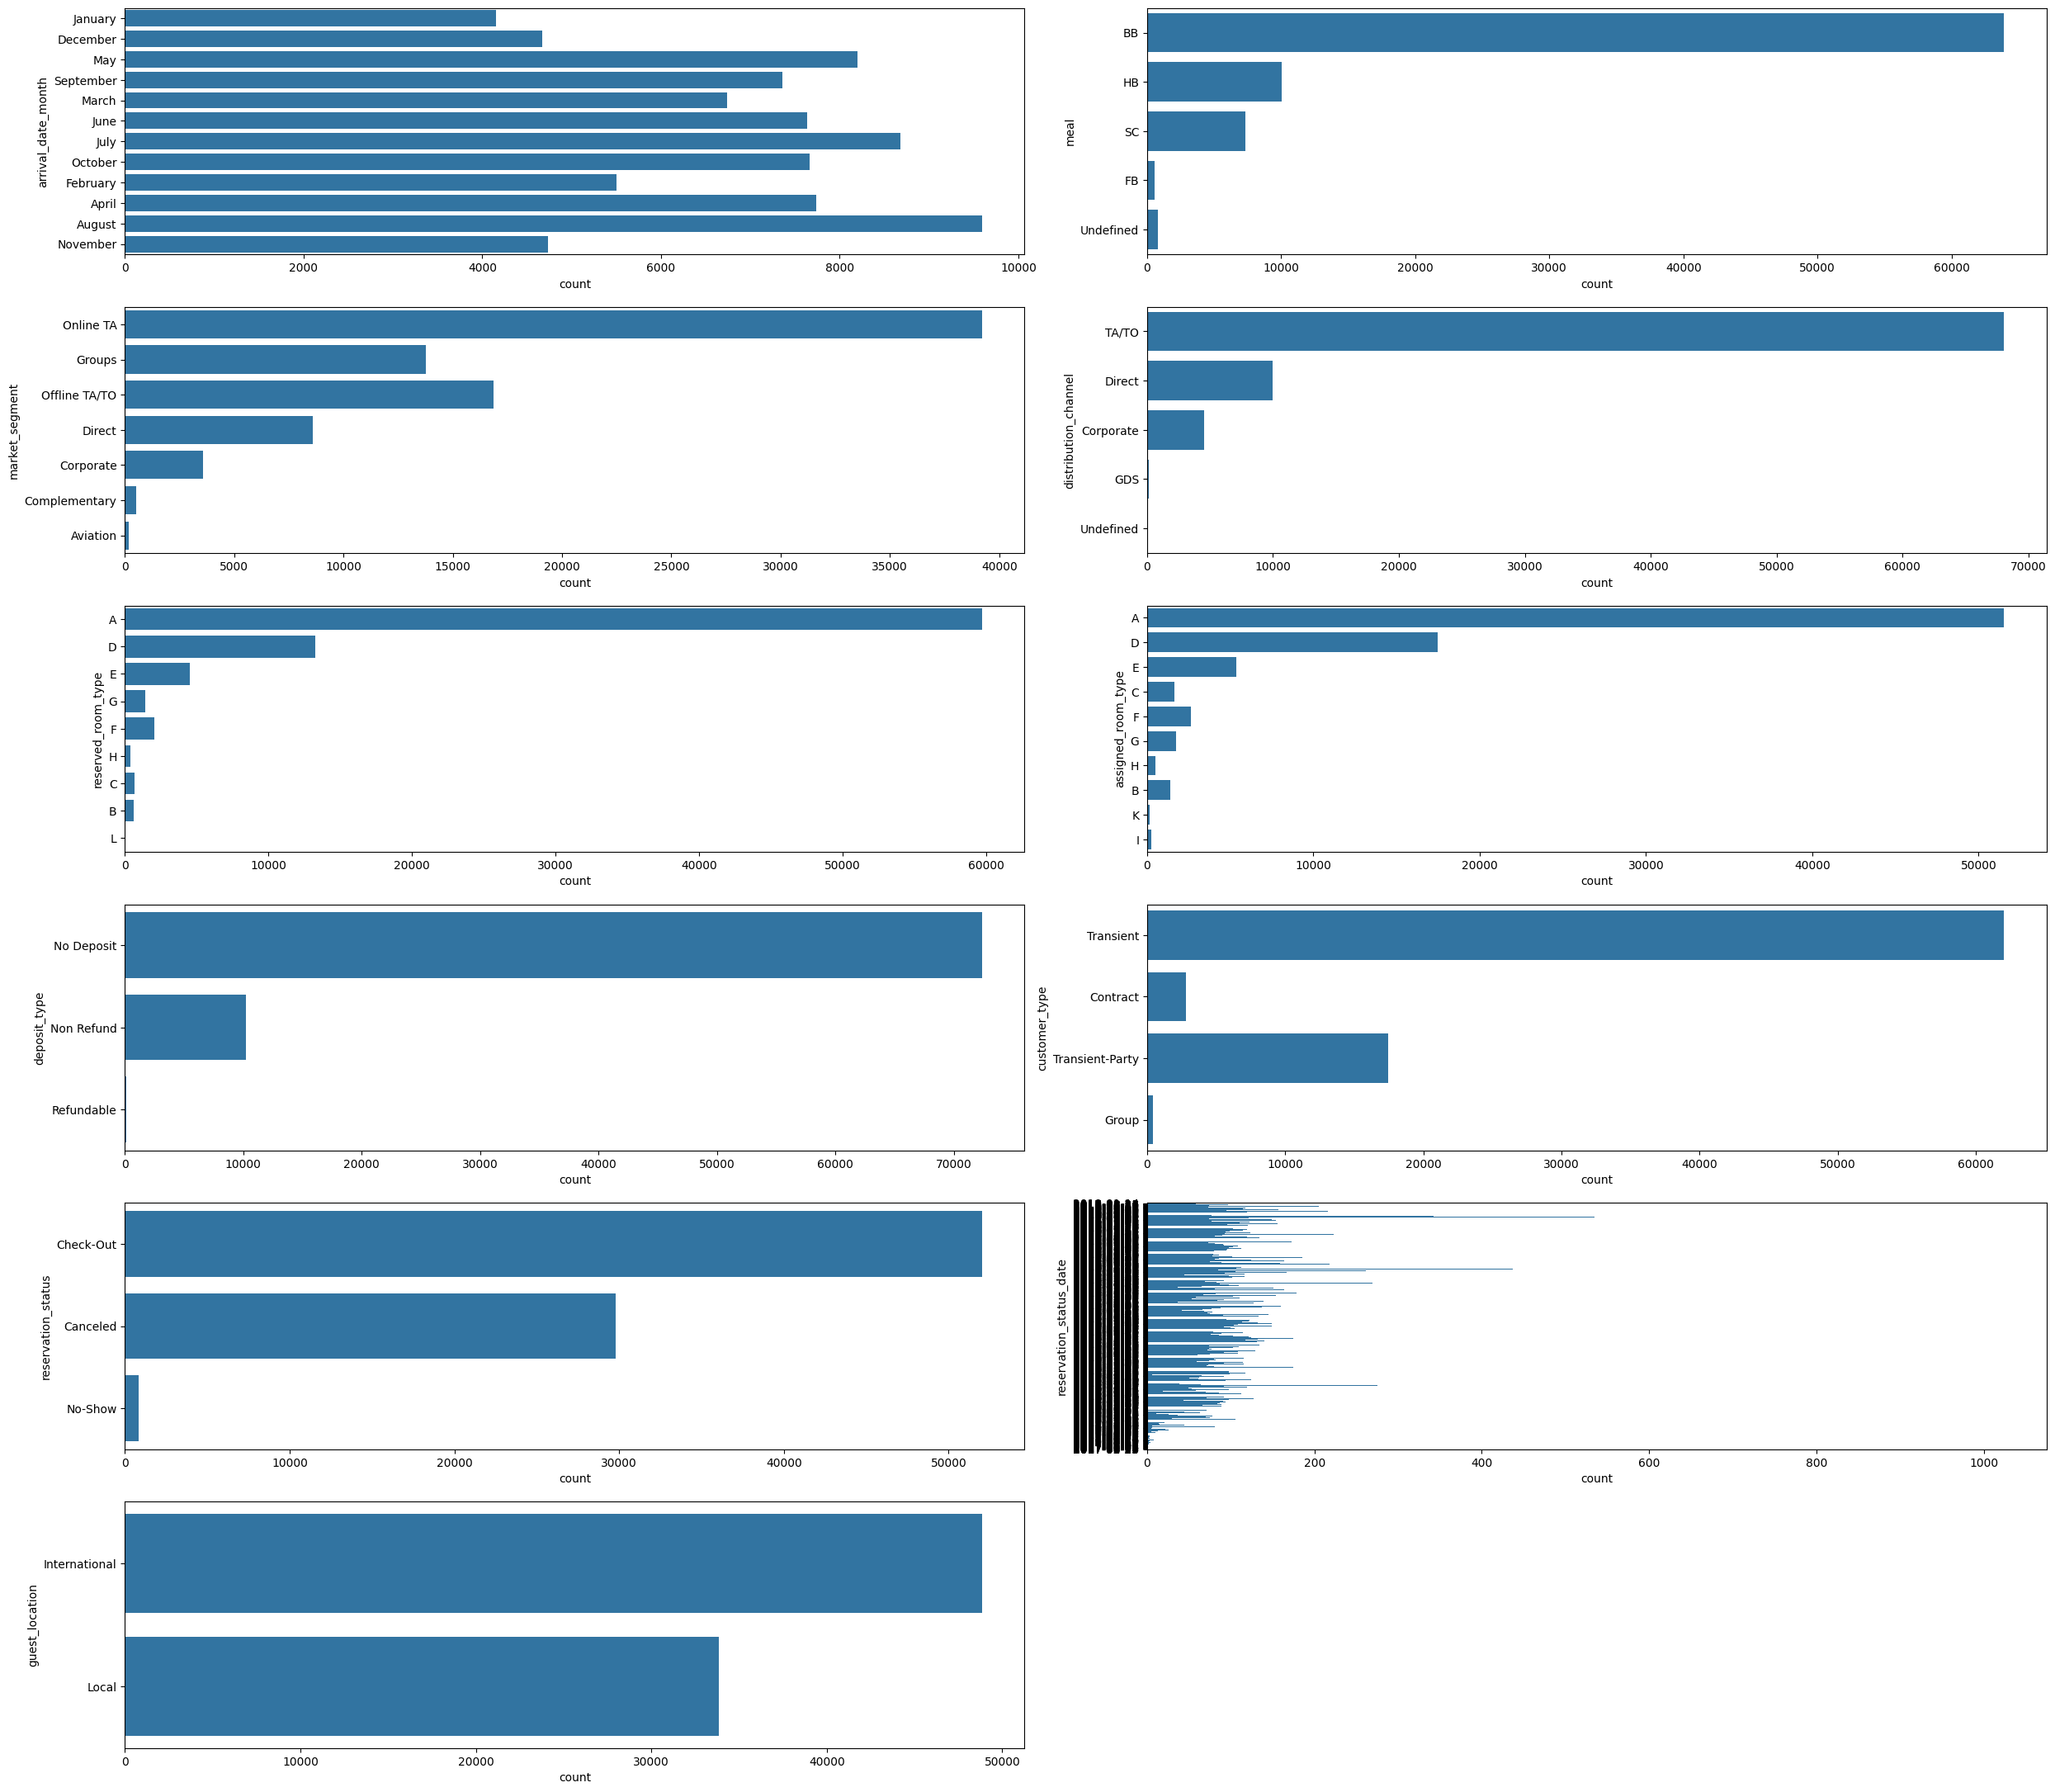

In [32]:
plt.figure(figsize=(25, 25))
for i in range(0, len(categorical)):
    plt.subplot(7, int(len(categorical)/5), i+1)
    sns.countplot(df1[categorical[i]])
    plt.tight_layout()

* Most customers make hotel bookings for the months *July* and *August* (summer)
* Most customers are from international customers
* Most customers choose to book at hotels with the *No Deposit* type
* Most meal booked is Bed anf Breakfast
* Most distribusion channel is TA/TO
* Most market segments or distribution channels come from Online Travel Agents
* Most selected room types are *A*
* From the `reservation_status` column, it can be seen that the proportion of data is imbalanced between canceled and not hotel bookings
* Column `reservation_status_date` has many values because it is date data
* For other columns it looks dominated by certain values

# Feature Engineering 2

## Reformatting Feature

Change value for `previous_cancellations` to 0 and 1.<br>
* 0 -> no previous cancellations
* 1 -> previous cancellations > 0

In [33]:
df1['previous_cancellations'] = df1['previous_cancellations'].apply(lambda x: 0 if x == 0 else 1)
df1['previous_cancellations'].value_counts()

previous_cancellations
0    78296
1     4369
Name: count, dtype: int64

Change value for `booking_changes` to 0 and 1.<br>

* 0 -> no booking changes
* 1 -> booking changes > 0

In [34]:
df1['booking_changes'] = df1['booking_changes'].apply(lambda x: 0 if x == 0 else 1)
df1['booking_changes'].value_counts()

booking_changes
0    70128
1    12537
Name: count, dtype: int64

# Exploratory Data Analysis (EDA) 2

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82665 entries, 0 to 82664
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     82665 non-null  int64  
 1   lead_time                       82665 non-null  int64  
 2   arrival_date_year               82665 non-null  int64  
 3   arrival_date_month              82665 non-null  object 
 4   arrival_date_week_number        82665 non-null  int64  
 5   arrival_date_day_of_month       82665 non-null  int64  
 6   adults                          82665 non-null  int64  
 7   meal                            82665 non-null  object 
 8   market_segment                  82665 non-null  object 
 9   distribution_channel            82665 non-null  object 
 10  is_repeated_guest               82665 non-null  int64  
 11  previous_cancellations          82665 non-null  int64  
 12  previous_bookings_not_canceled  

## Class imbalance 

In [36]:
df1['is_canceled'].value_counts()

is_canceled
0    52006
1    30659
Name: count, dtype: int64

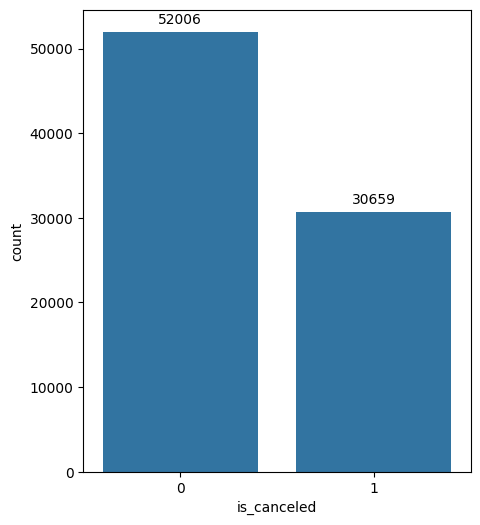

In [37]:
plt.figure(figsize=(5, 6))
cancel_ax = sns.barplot(x=df1['is_canceled'].value_counts().index, y=df1['is_canceled'].value_counts())

for p in cancel_ax.patches:
    cancel_ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

([<matplotlib.patches.Wedge at 0x1b9b5841e10>,
 [Text(-0.434062280942242, 1.0107373230781667, 'Confirmed Booking'),
  Text(0.43406237557429767, -1.0107372824383187, 'Cancelled Booking')],
 [Text(-0.23676124415031377, 0.5513112671335454, '62.9%'),
  Text(0.2367612957677987, -0.5513112449663555, '37.1%')])

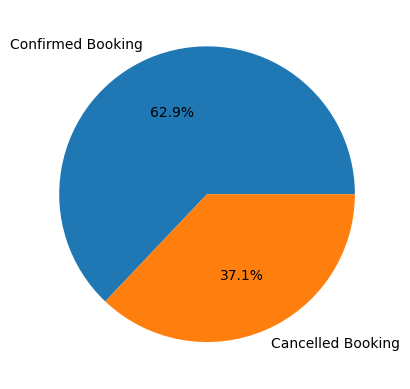

In [38]:
plt.pie(df1['is_canceled'].value_counts().values, 
        labels = ['Confirmed Booking',  'Cancelled Booking'],
        autopct='%1.1f%%')

In proportion, the comparison between classes is imbalanced. The proportion between classes is 63% : 37%

## Distribution of ADR

C:\Users\ramad\AppData\Local\Temp\ipykernel_24544\749985565.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['adr'])


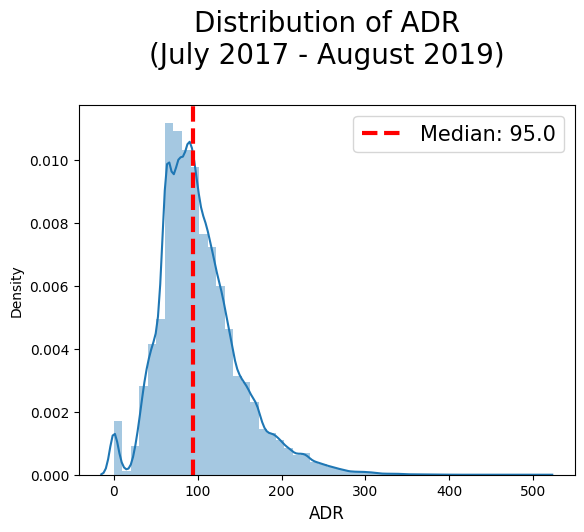

In [39]:
adr_median = df1['adr'].median()
sns.distplot(df1['adr'])
plt.title('Distribution of ADR\n(July 2017 - August 2019)', fontsize=20, pad=30)
plt.axvline(adr_median, color='red', linestyle='dashed', linewidth=3, label='Median: ' + str(round(adr_median, 2))) 
plt.xlabel('ADR', fontsize=12)
plt.legend(fontsize=15)
plt.show()

* 50% ADR on this dataset is worth 95 Euros

## Number of Days Between Cancelation Date and Expected Arrival Date

In [40]:
df1['arrival_date'] = df1['arrival_date_year'].astype(str) + "-" + df1['arrival_date_month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}).astype(str) + "-" + df1['arrival_date_day_of_month'].astype(str)

In [41]:
df1['arrival_date']

0         2019-1-10
1        2018-12-15
2         2019-5-19
3         2017-9-26
4         2018-3-21
            ...    
82660    2018-10-25
82661     2017-9-14
82662     2019-6-21
82663     2018-7-31
82664    2018-10-20
Name: arrival_date, Length: 82665, dtype: object

In [42]:
df1['arrival_date'] = pd.to_datetime(df1['arrival_date'], format="%Y-%m-%d", errors='coerce')
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format="%Y-%m-%d")

In [43]:
df1[df1.isna().any(axis=1)]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays,total_guests,kids,guest_location,RateSpecialReq_to_TotalGuest,cancelrate_byMarket,arrival_date
1550,1,117,2018,February,10,29,2,BB,Offline TA/TO,TA/TO,0,1,0,A,A,0,Non Refund,1,44,Transient,75.00,0,0,Canceled,2017-12-18,3,2,0,Local,0.0,0.342908,NaT
3042,0,117,2018,February,10,29,2,BB,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,1,0,Transient-Party,86.33,0,0,Check-Out,2018-03-03,3,2,0,International,0.0,0.342908,NaT
3054,1,138,2018,February,10,29,2,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,40.50,0,1,Canceled,2017-12-31,10,2,0,Local,0.5,0.367236,NaT
3758,1,117,2018,February,10,29,2,BB,Offline TA/TO,TA/TO,0,1,0,A,A,0,Non Refund,1,44,Transient,75.00,0,0,Canceled,2017-12-18,3,2,0,Local,0.0,0.342908,NaT
4447,1,21,2018,February,10,29,1,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,102.05,0,0,Canceled,2018-02-26,4,1,0,International,0.0,0.367236,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77282,1,117,2018,February,10,29,2,BB,Offline TA/TO,TA/TO,0,1,0,A,A,0,Non Refund,1,44,Transient,75.00,0,0,Canceled,2017-12-18,3,2,0,Local,0.0,0.342908,NaT
78347,1,50,2018,February,10,29,2,SC,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,76.50,0,0,Canceled,2018-02-25,1,2,0,International,0.0,0.367236,NaT
78724,1,40,2018,February,10,29,2,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,48.00,0,2,Canceled,2018-01-23,5,2,0,Local,1.0,0.367236,NaT
80961,1,117,2018,February,10,29,2,BB,Offline TA/TO,TA/TO,0,1,0,A,A,0,Non Refund,1,44,Transient,75.00,0,0,Canceled,2017-12-18,3,2,0,Local,0.0,0.342908,NaT


In [44]:
df1 = df1.dropna()
df1.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
adults                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
total_stays                       0
total_guests                      0
kids                        

Ada data yang tidak valid yaitu arrival_date pada tahun 2018 seharusnya tidak ada tanggal 29 pada bulan februari karena tidak tahun kabisat, sehingga baris pada tanggal 29 harus dihapus

In [45]:
df1['cancel_or_stay_length'] = abs((df1['arrival_date'] - df1['reservation_status_date']).dt.days)

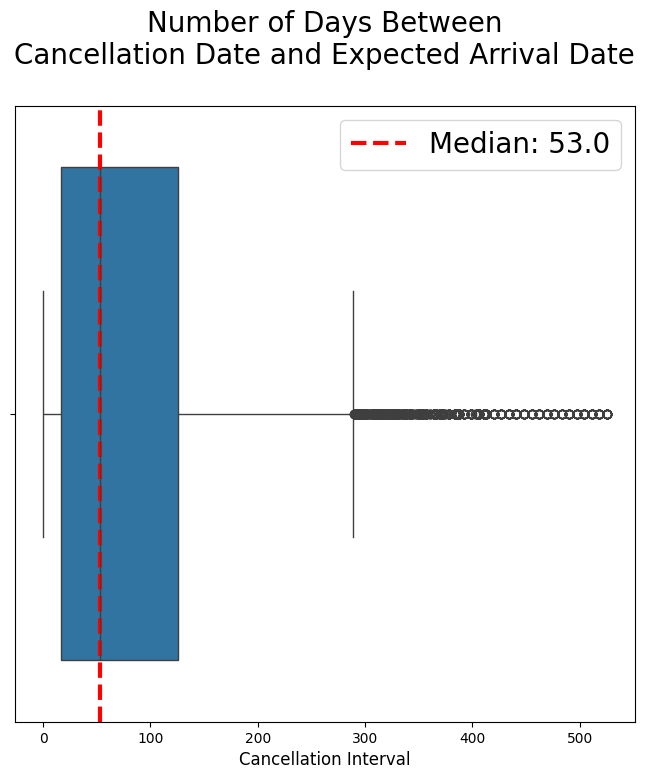

In [46]:
l_median = df1['cancel_or_stay_length'][(df1.is_canceled == 1)].median()
plt.figure(figsize=(8, 8))
sns.boxplot(df1['cancel_or_stay_length'][(df1.is_canceled == 1)],orient='h')
plt.axvline(l_median, color='red', linestyle='dashed', linewidth=3, label='Median: ' + str(round(l_median, 2)))   
plt.xlabel('Cancellation Interval', fontsize=12)
plt.title('Number of Days Between\nCancellation Date and Expected Arrival Date', fontsize=20, pad=30)
plt.legend(fontsize=20)
plt.show()

* 50% of customers cancel 53 days (1.8 months) before arrival date

## Lead Time and Cancellation

C:\Users\ramad\AppData\Local\Temp\ipykernel_24544\3830166826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  lead_time_ax = sns.boxplot(x='is_canceled', y='lead_time', data=df1, palette='Paired')
C:\Users\ramad\AppData\Local\Temp\ipykernel_24544\3830166826.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  lead_time_ax.set_xticklabels(['No', 'Yes'])


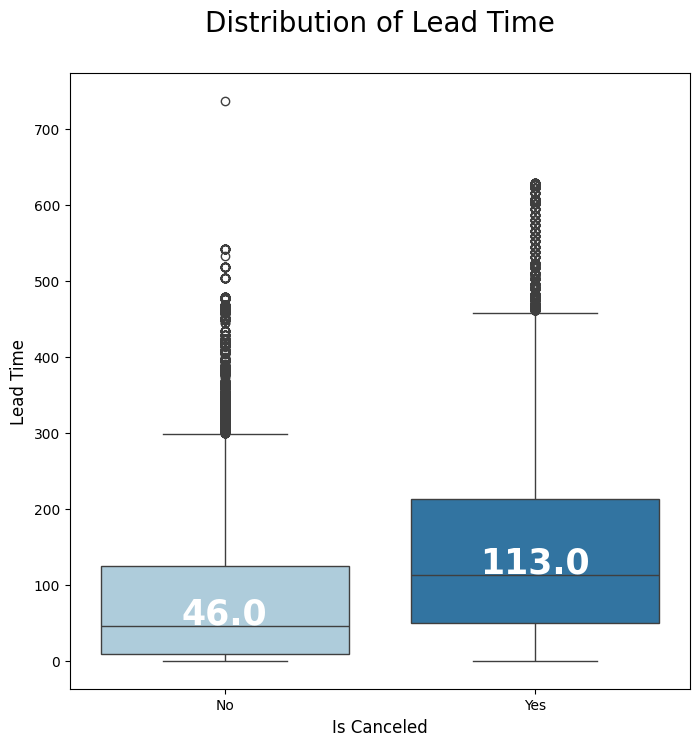

In [47]:
plt.figure(figsize=(8, 8))
lead_time_ax = sns.boxplot(x='is_canceled', y='lead_time', data=df1, palette='Paired')
lead_time_ax.set_xticklabels(['No', 'Yes'])
plt.ylabel('Lead Time', fontsize=12)
plt.xlabel('Is Canceled', fontsize=12)
plt.title('Distribution of Lead Time', fontsize=20, pad=30)
medians = df1.groupby(['is_canceled'])['lead_time'].median()
vertical_offset = df1['lead_time'].median() * 0.05
for xtick in lead_time_ax.get_xticks():
    lead_time_ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',fontsize=25,color='w',weight='semibold')

plt.show()

* The longer the lead time, the greater the possibility that the customer will cancel the hotel booking

* It makes sense that if the number of days between when the booking is made and the estimated date of arrival increases, customers have more time to cancel reservations and more time for unforeseen circumstances that could derail travel plans

## Deposit Type and Cancellation

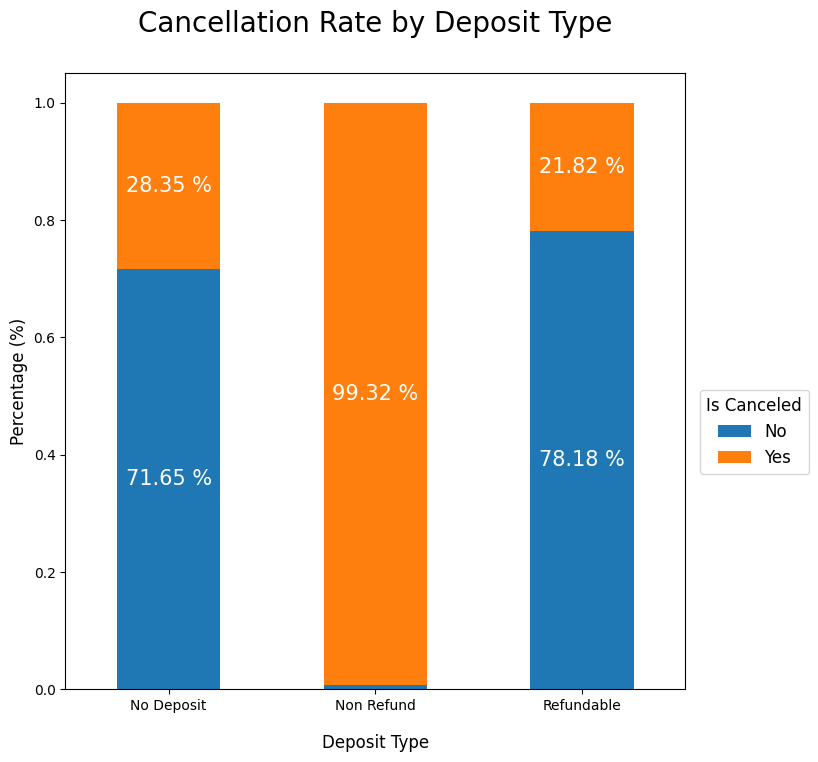

In [48]:
deposit_ax = pd.crosstab(df1['deposit_type'], df1['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])

j = 1    
for p in deposit_ax.patches:
    if j != 2:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      deposit_ax.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
              color='white', fontsize=15)
    j += 1
    
plt.title('Cancellation Rate by Deposit Type', fontsize=20, pad=30)  
plt.xticks(rotation=360)  
plt.xlabel('Deposit Type', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

C:\Users\ramad\AppData\Local\Temp\ipykernel_24544\1943378503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  deposit_ax2 = sns.boxplot(x='deposit_type', y='lead_time', data=df1, palette='Paired')


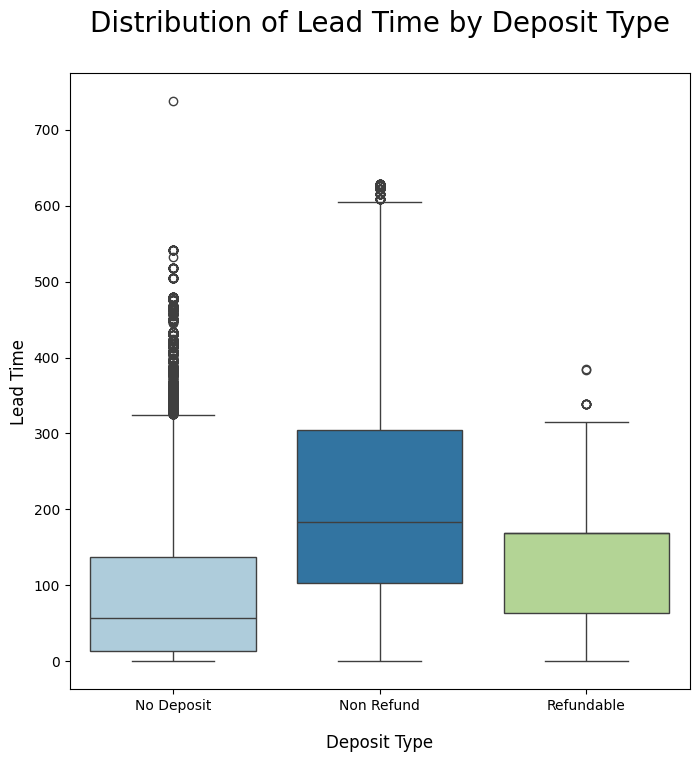

In [49]:
plt.figure(figsize=(8, 8))
deposit_ax2 = sns.boxplot(x='deposit_type', y='lead_time', data=df1, palette='Paired')
plt.ylabel('Lead Time', fontsize=12)
plt.xlabel('Deposit Type', fontsize=12, labelpad=15)
plt.title('Distribution of Lead Time by Deposit Type', fontsize=20, pad=30)
plt.show()

* Hotel bookings with non-refundable deposit types have the largest cancellation rates, reaching 99% compared to other deposit types.

* One of the reasons is because hotel bookings with non-refundable deposit types have the highest median lead time. Customers may need more time to consider and plan their trip carefully when they learn that their deposit is non-refundable.

## Previous Cancellations and Cancellation

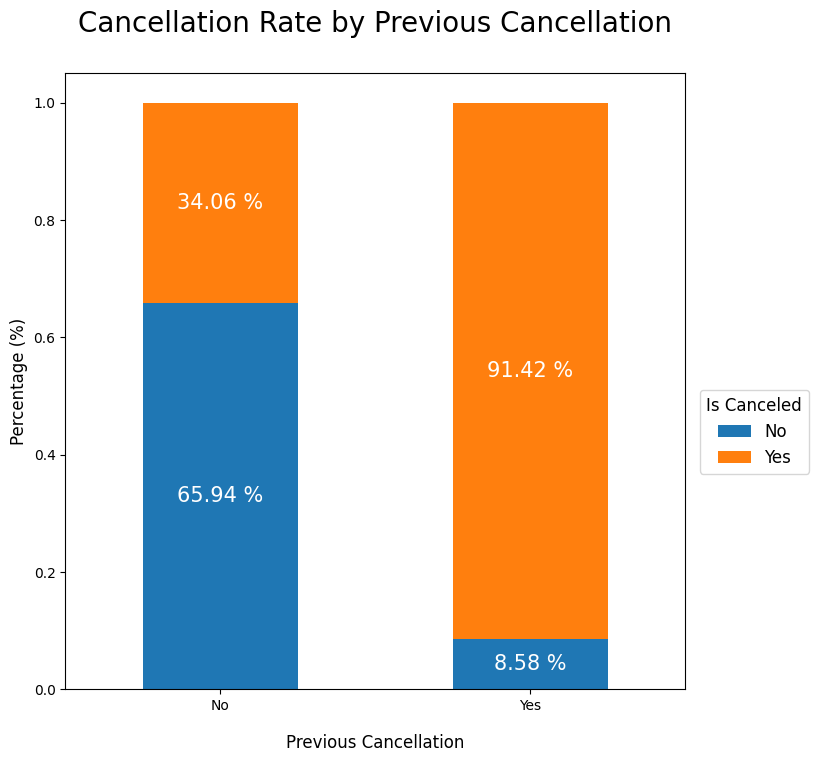

In [50]:
previous_ax = pd.crosstab(df1['previous_cancellations'], df1['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in previous_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    previous_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Cancellation Rate by Previous Cancellation', fontsize=20, pad=30)   
previous_ax.set_xticklabels(['No','Yes'], rotation=360) 
plt.xlabel('Previous Cancellation', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

* Customers who have canceled previous hotel bookings are 91% likely to cancel again

## Guest Location and Cancellation

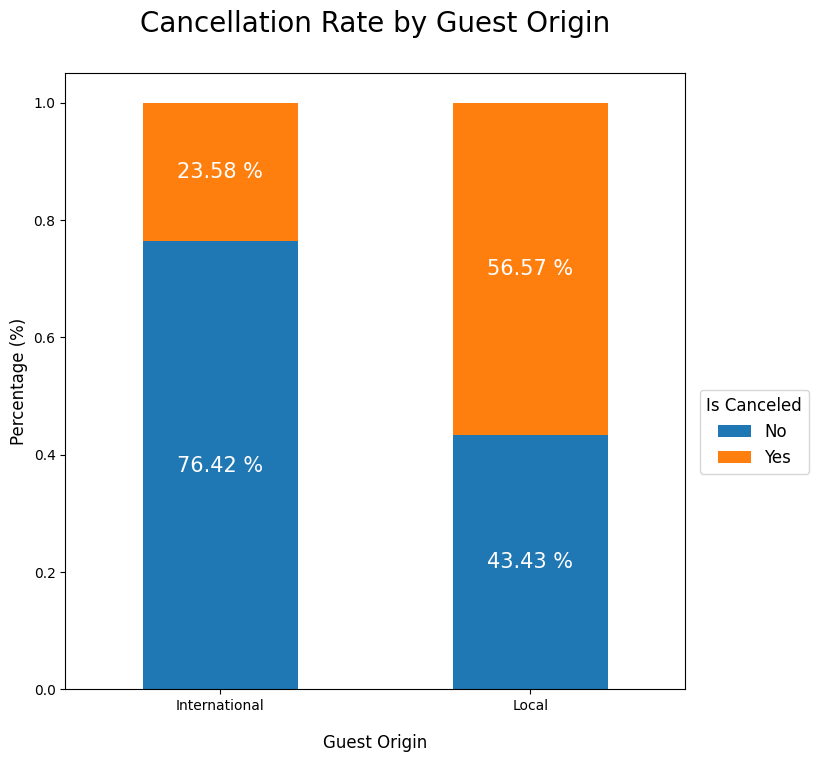

In [51]:
guest_ax = pd.crosstab(df1['guest_location'], df1['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in guest_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    guest_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Cancellation Rate by Guest Origin', fontsize=20, pad=30)   
plt.xticks(rotation=360) 
plt.xlabel('Guest Origin', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

C:\Users\ramad\AppData\Local\Temp\ipykernel_24544\723179819.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='guest_location', y='lead_time', data=df1, palette='Paired')


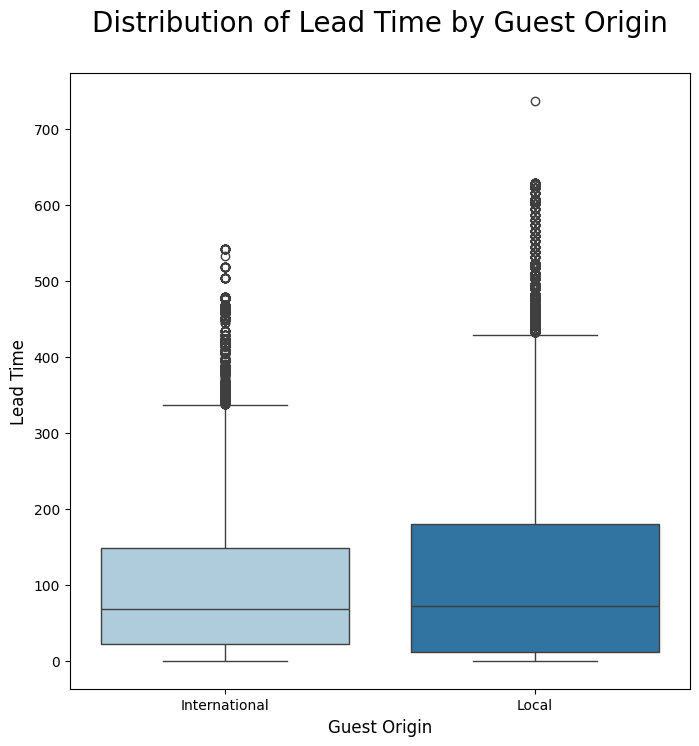

In [52]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='guest_location', y='lead_time', data=df1, palette='Paired')
plt.ylabel('Lead Time', fontsize=12)
plt.xlabel('Guest Origin', fontsize=12)
plt.title('Distribution of Lead Time by Guest Origin', fontsize=20, pad=30)
plt.show()

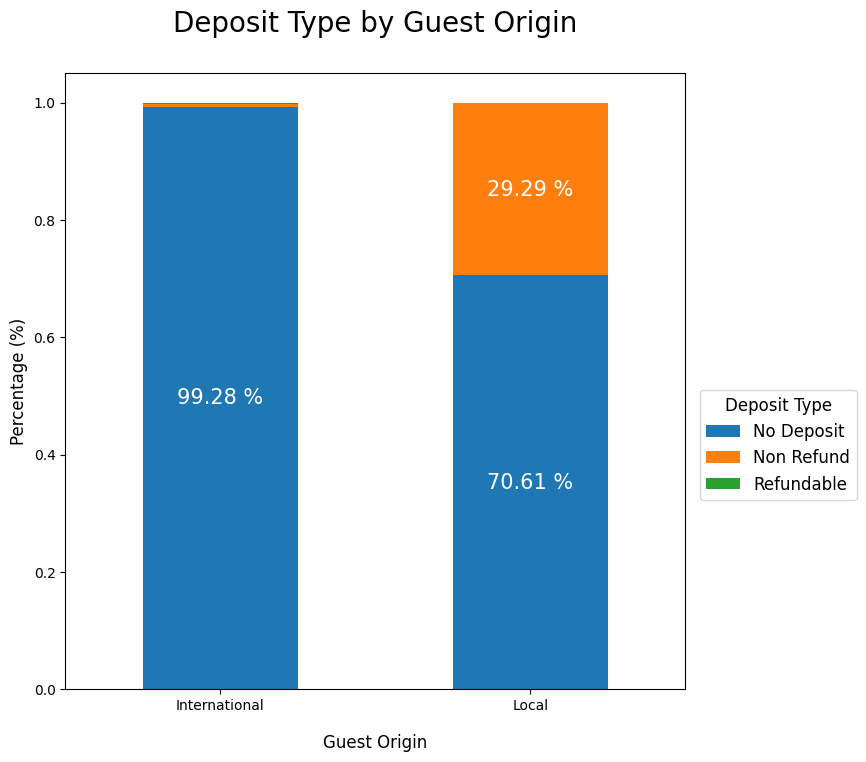

In [53]:
guest_ax2 = pd.crosstab(df1['guest_location'], df1['deposit_type'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Deposit Type', fontsize=12, title_fontsize=12)

j = 1
for p in guest_ax2.patches:
    if j == 1 or j == 2 or j == 4:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      guest_ax2.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
              color='white',
              fontsize=15)
    j += 1

plt.title('Deposit Type by Guest Origin', fontsize=20, pad=30)   
plt.xticks(rotation=360) 
plt.xlabel('Guest Origin', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

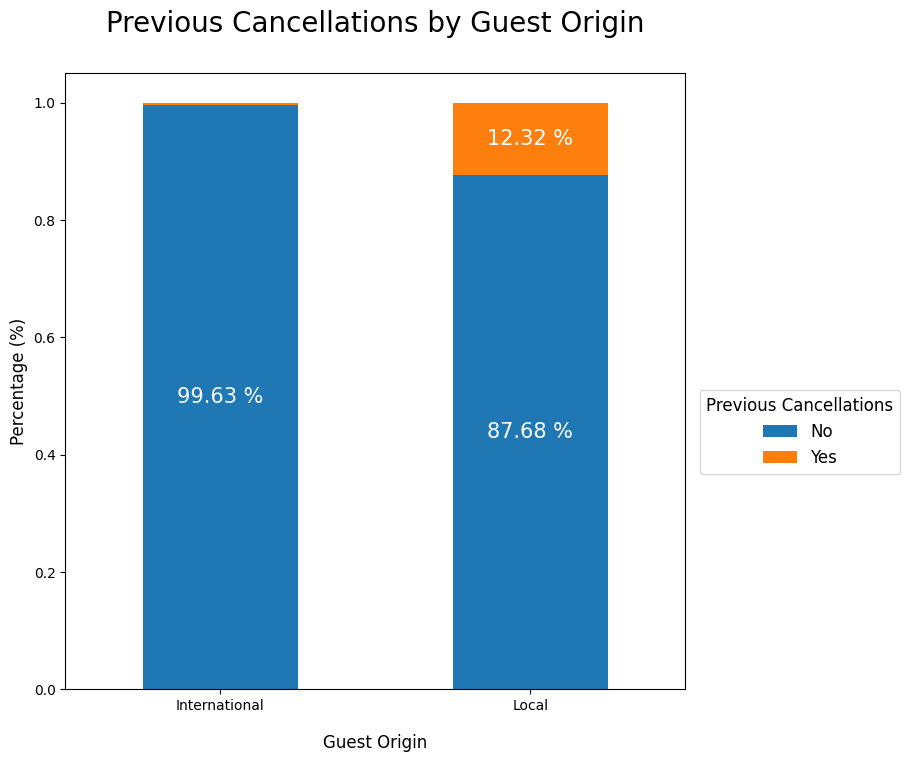

In [54]:
guest_ax3 = pd.crosstab(df1['guest_location'], df1['previous_cancellations'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Previous Cancellations', fontsize=12, title_fontsize=12, labels=['No', 'Yes'])

j = 1
for p in guest_ax3.patches:
    if j == 1 or j == 2 or j == 4:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      guest_ax3.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
              color='white',
              fontsize=15)
    j += 1

plt.title('Previous Cancellations by Guest Origin', fontsize=20, pad=30)  
plt.xticks(rotation=360)  
plt.xlabel('Guest Origin', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

* Local customers have a higher cancellation rate than international customers
* Non-refundable deposit type for local customers is higher than international guests
* Rates of previously canceled hotel bookings are higher for local customers than international customers
* The median lead time does not look much different

## Repeated Guest and Cancellation

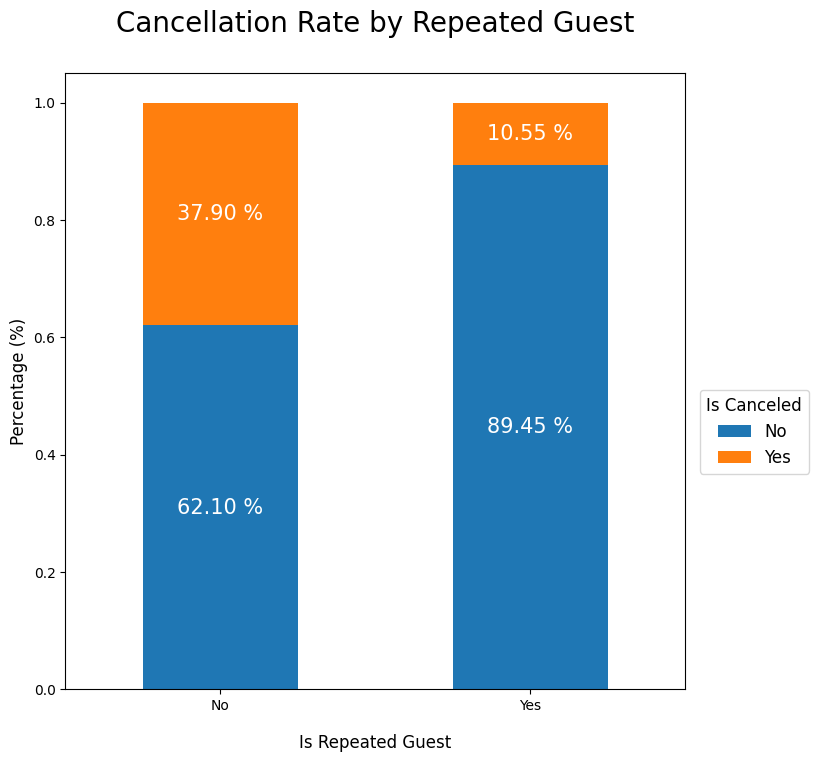

In [55]:
repeat_ax = pd.crosstab(df1['is_repeated_guest'], df1['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in repeat_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    repeat_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Cancellation Rate by Repeated Guest', fontsize=20, pad=30)    
repeat_ax.set_xticklabels(['No', 'Yes'], rotation=360)
plt.xlabel('Is Repeated Guest', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

* Repeated guests are less likely to cancel compared to non-repeated guests

## Market Segment and Cancellation

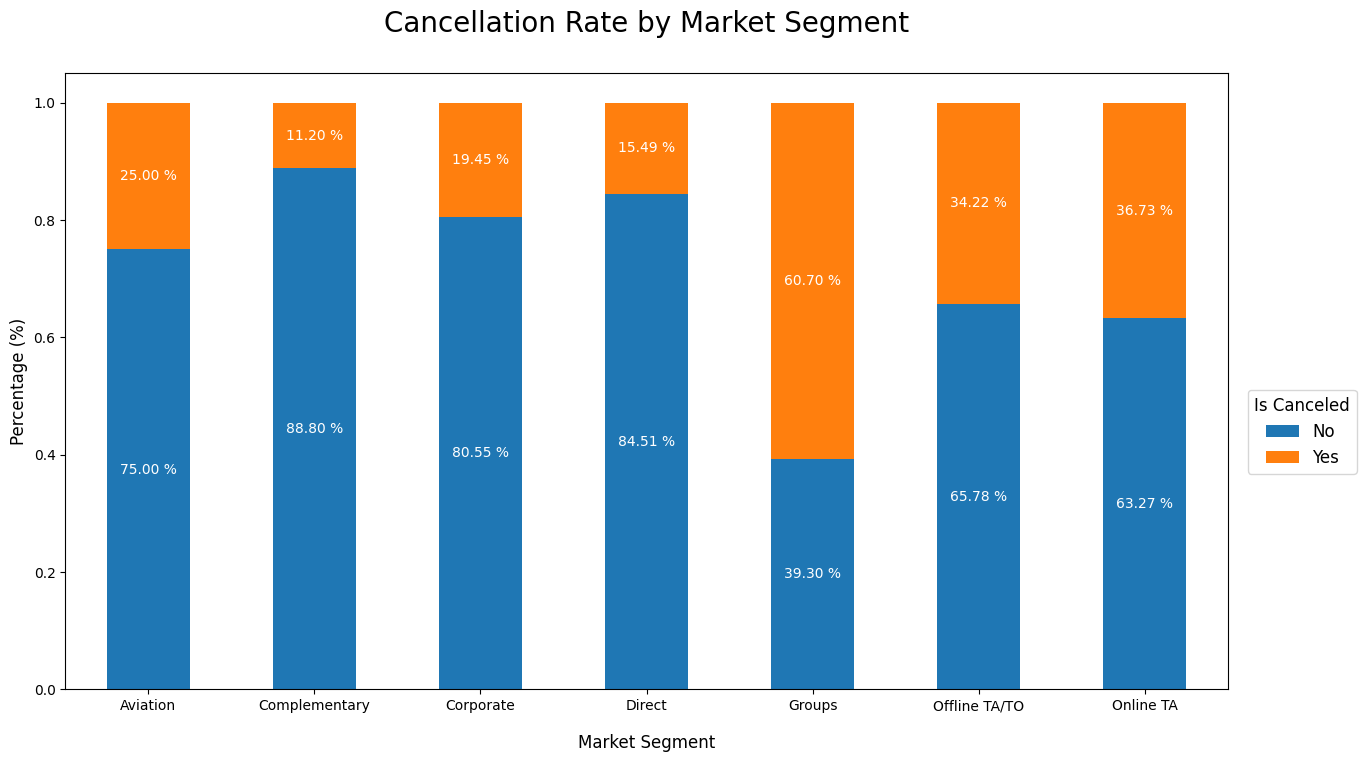

In [56]:
market_ax = pd.crosstab(df1['market_segment'], df1['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in market_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    market_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=10)
    
plt.title('Cancellation Rate by Market Segment', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Market Segment', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

C:\Users\ramad\AppData\Local\Temp\ipykernel_24544\2901758118.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='market_segment', y='lead_time', data=df1, palette='Paired')


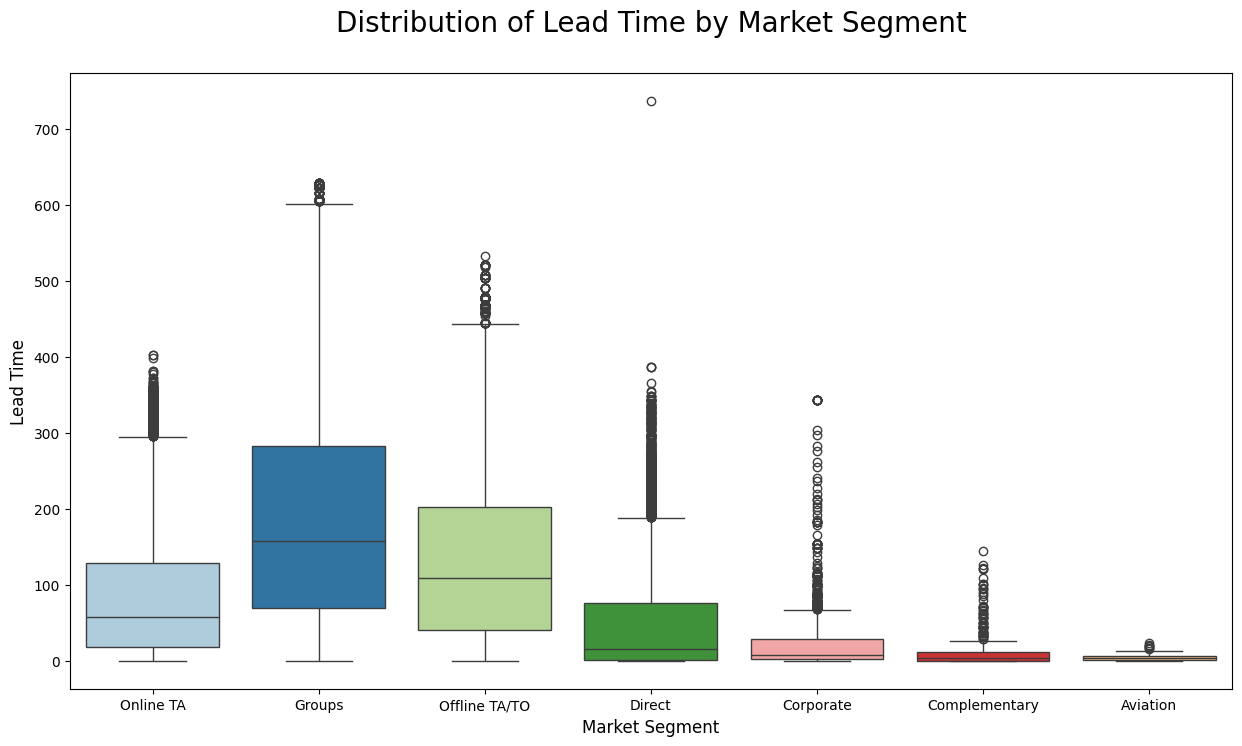

In [57]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='market_segment', y='lead_time', data=df1, palette='Paired')
plt.ylabel('Lead Time', fontsize=12)
plt.xlabel('Market Segment', fontsize=12)
plt.title('Distribution of Lead Time by Market Segment', fontsize=20, pad=30)
plt.show()

* The market segment group has the highest cancellation rate, reaching 60.7%. It can be concluded because it has the longest median lead time
* The direct market segment and complementary have the lowest cancellation rate

## Customer Type and Cancellation

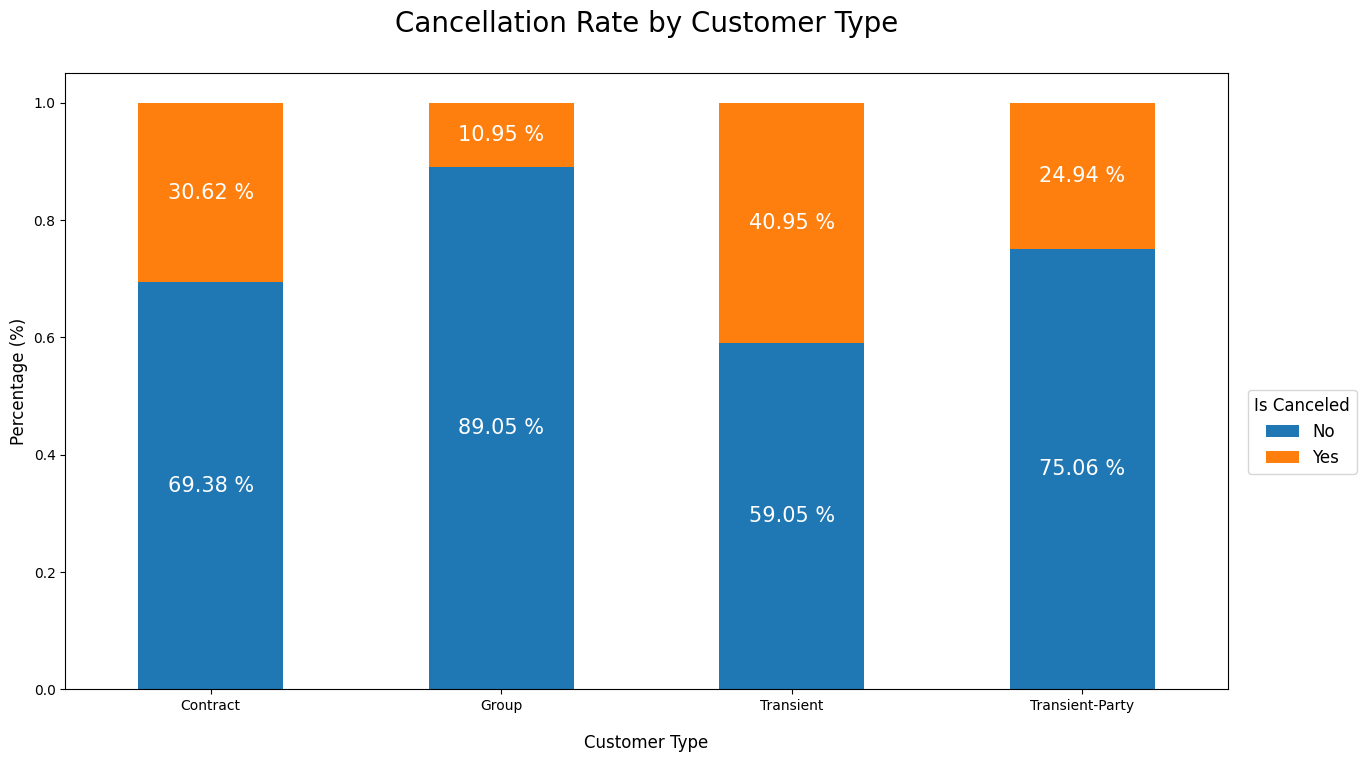

In [58]:
customer_ax = pd.crosstab(df1['customer_type'], df1['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in customer_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    customer_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Cancellation Rate by Customer Type', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Customer Type', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

* Customer type transient has the highest cancellation rate, reaching 40.95%
* Customer type group has the lowest cancellation rate

## Booking Changes and Cancellation

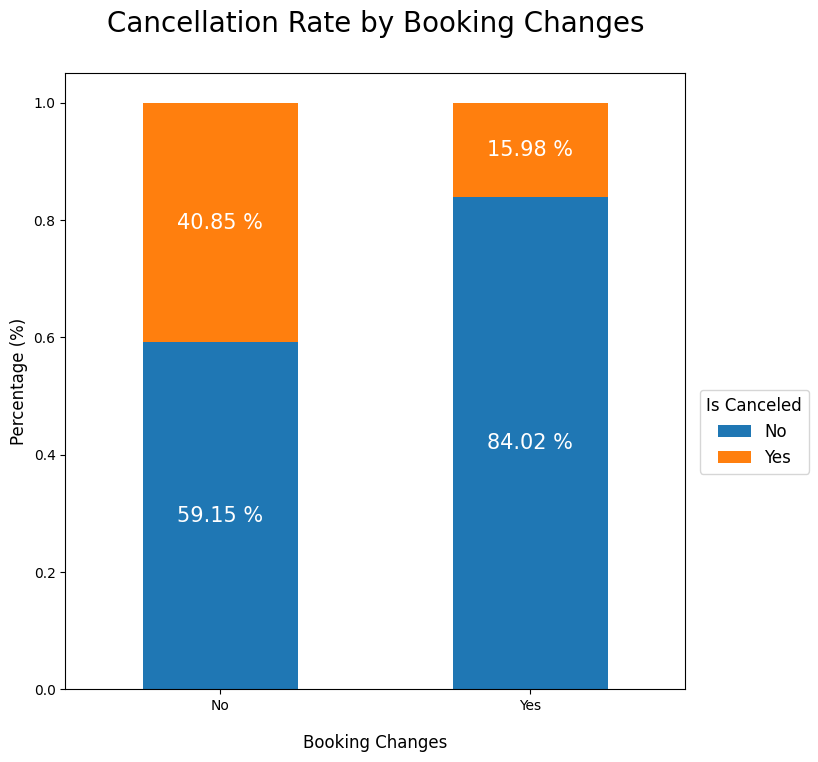

In [59]:
booking_ax = pd.crosstab(df1['booking_changes'], df1['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in booking_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    booking_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Cancellation Rate by Booking Changes', fontsize=20, pad=30)   
booking_ax.set_xticklabels(['No', 'Yes'], rotation=360)
plt.xlabel('Booking Changes', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

* Customers who make changes to booking details have a smaller cancellation rate than those who don't

## Special Request and Cancellation

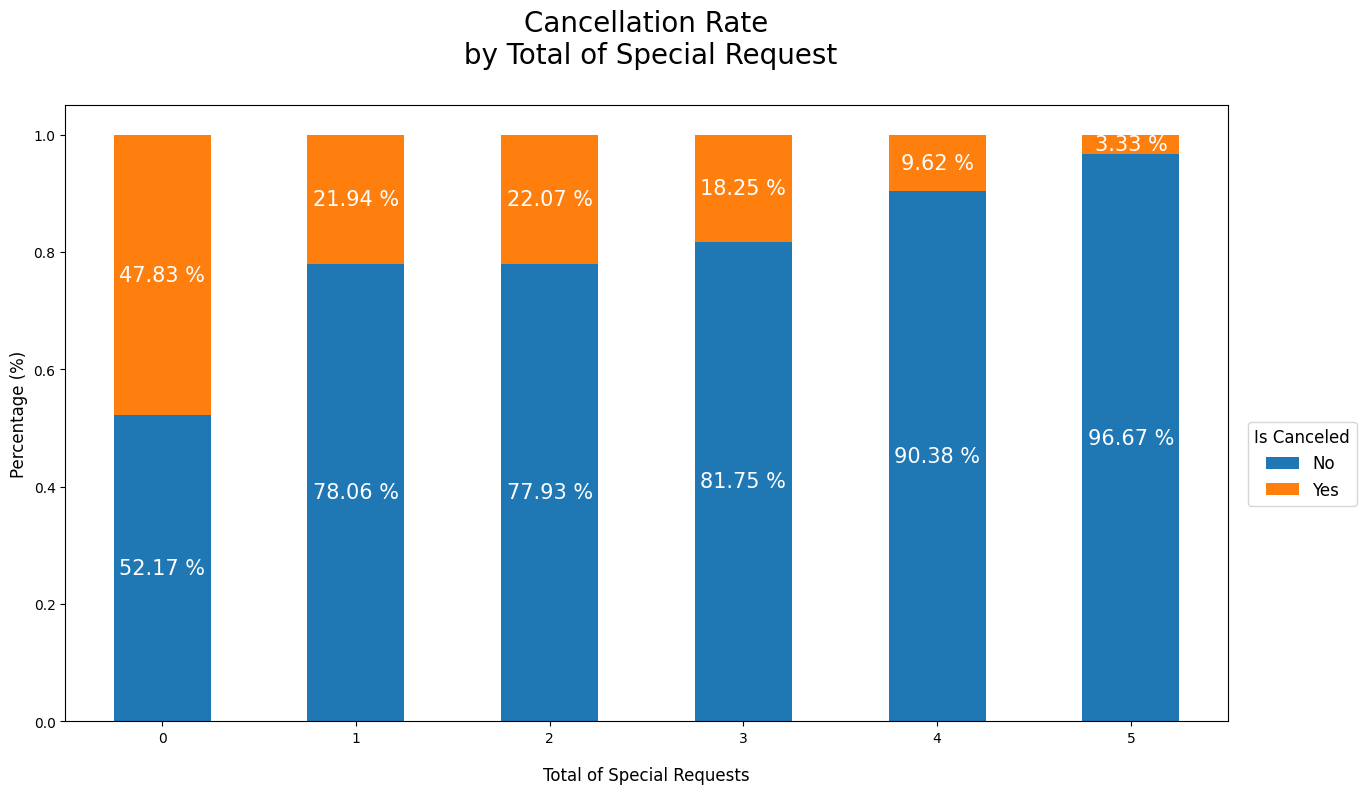

In [60]:
request_ax = pd.crosstab(df1['total_of_special_requests'], df1['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in request_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    request_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Cancellation Rate\n by Total of Special Request', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Total of Special Requests', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

* The more customers request special requests, the smaller the cancellation rate

## Parking Space and Cancellation

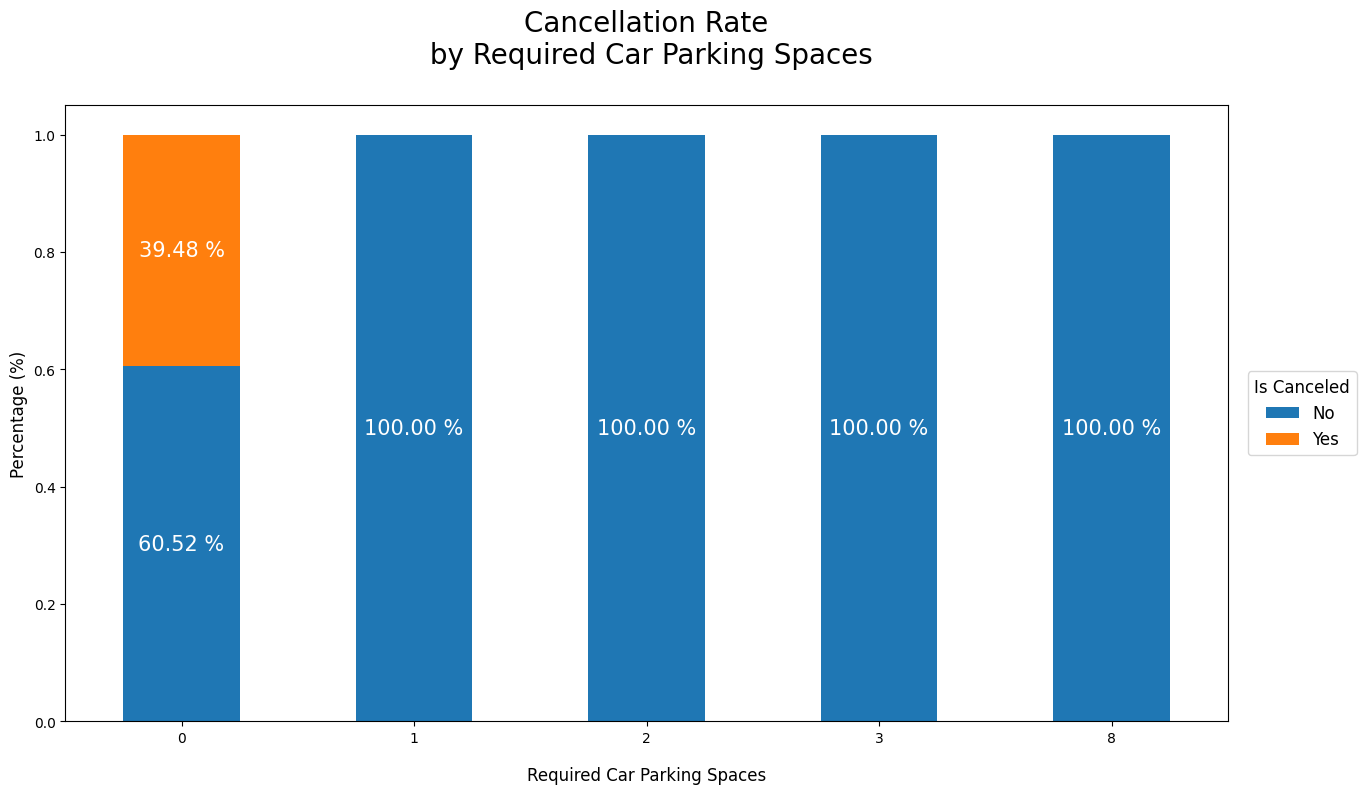

In [61]:
parking_ax = pd.crosstab(df1['required_car_parking_spaces'], df1['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])

j = 1    
for p in parking_ax.patches:
    if j < 7:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      parking_ax.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
              color='white', fontsize=15)
    j += 1
    
plt.title('Cancellation Rate\n by Required Car Parking Spaces', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Required Car Parking Spaces', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

* Customers who do not have a request for car parking are 40% likely to cancel their hotel booking\
From this column it will be further simplified to presence and absence (absence = 0, presence > 0)

In [62]:
df1['park_car_req'] = df1['required_car_parking_spaces'].apply(lambda x: 'No' if x == 0 else 'Yes')
df1['park_car_req'].value_counts()

park_car_req
No     77580
Yes     5021
Name: count, dtype: int64

## Meal Type & Cancellation

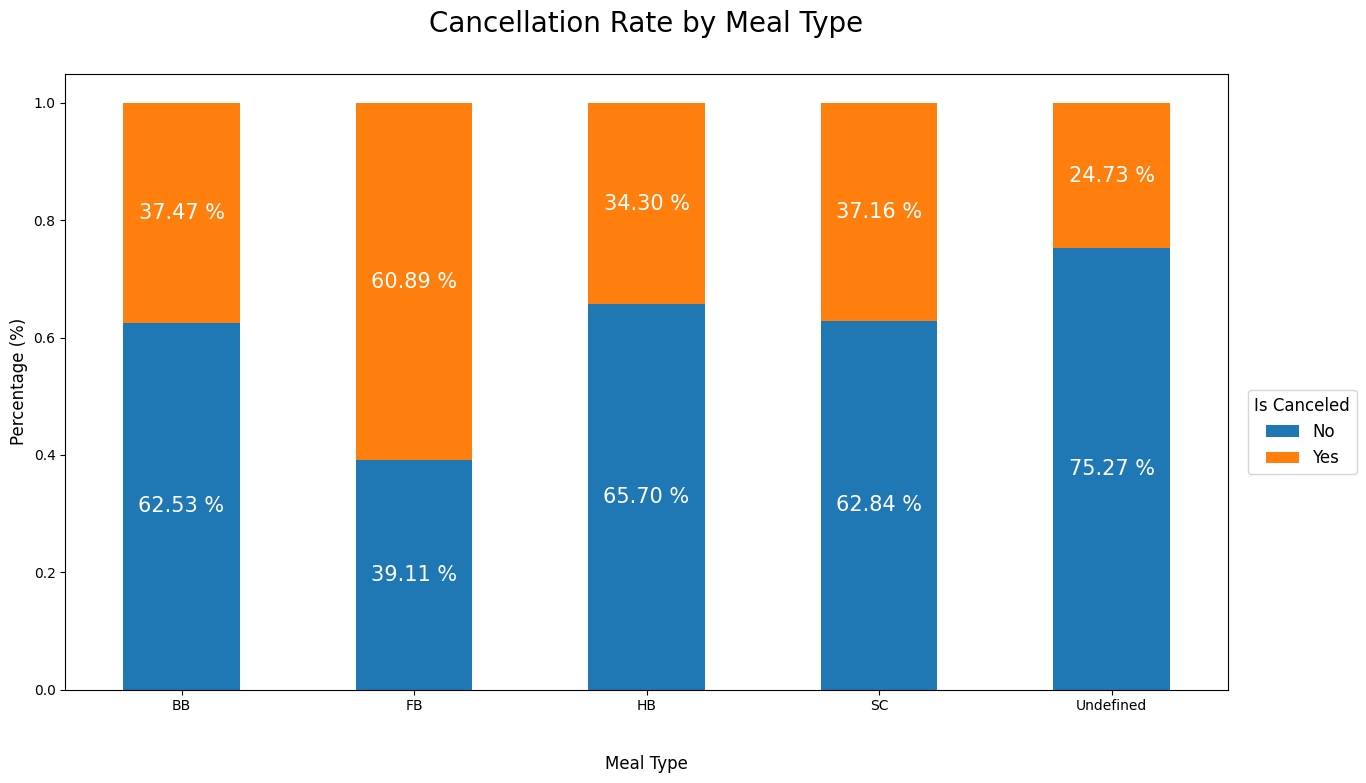

In [63]:
meal_ax = pd.crosstab(df1['meal'], df1['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
   
for p in meal_ax.patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      meal_ax.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
              color='white', fontsize=15)
    
plt.title('Cancellation Rate by Meal Type', fontsize=20, pad=30) 
plt.xticks(rotation=360)   
plt.xlabel('Meal Type', fontsize=12, labelpad=30)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

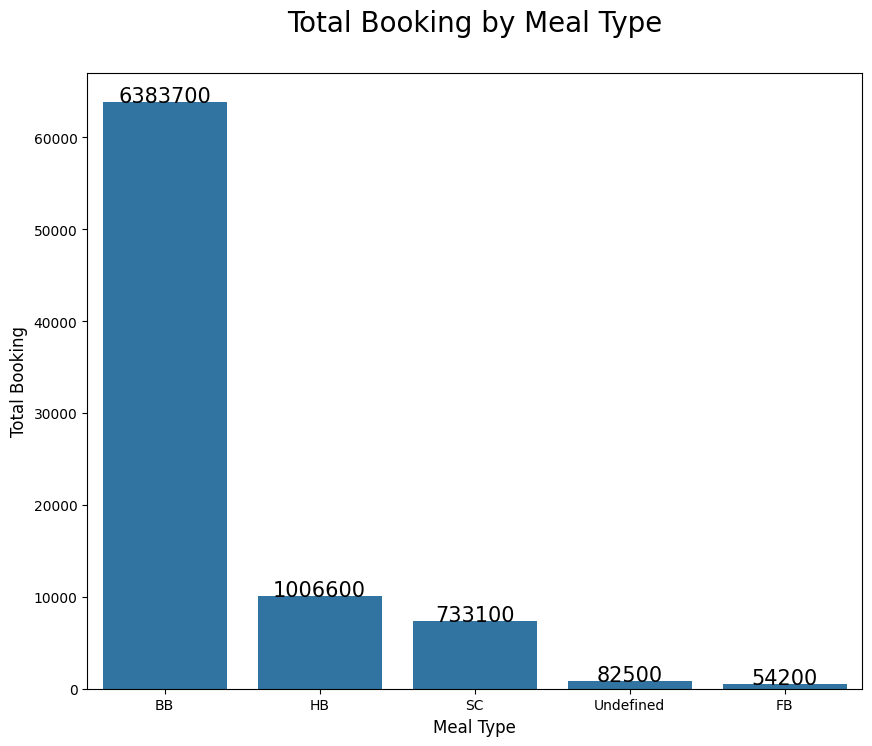

In [64]:
plt.figure(figsize=(10, 8))
meal_ax2 = sns.barplot(x = df1['meal'].value_counts().index, y = df1['meal'].value_counts())

for p in meal_ax2.patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      meal_ax2.text(x+width/2, 
              y+height, 
              '{:.0f}'.format(height*100), 
              horizontalalignment='center', 
              color = 'black', 
              fontsize=15)
      
plt.title('Total Booking by Meal Type', fontsize=20, pad=30)    
plt.xlabel('Meal Type', fontsize=12)
plt.ylabel('Total Booking', fontsize=12)
plt.show()

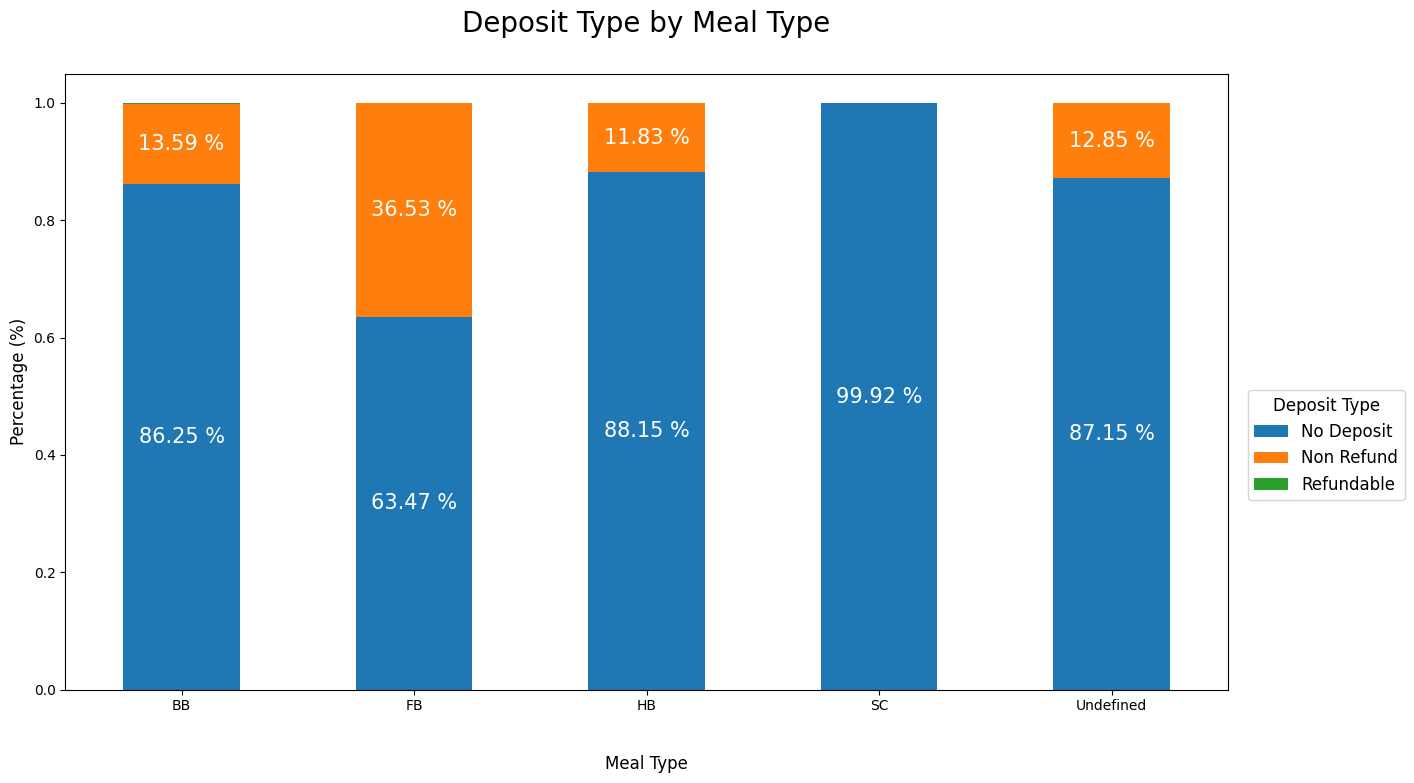

In [65]:
meal_ax3 = pd.crosstab(df1['meal'], df1['deposit_type'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Deposit Type', fontsize=12, title_fontsize=12)

j = 1
for p in meal_ax3.patches:
      if j < 9 or j == 10: 
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        meal_ax3.text(x+width/2, 
                y+height/2, 
                '{:.2f} %'.format(height*100), 
                horizontalalignment='center', 
                verticalalignment='center',
                color='white',
                fontsize=15)
      j += 1

plt.title('Deposit Type by Meal Type', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Meal Type', fontsize=12, labelpad=30)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

* Hotel booking with FB meal has the highest cancellation rate compared to other meals.

* It can be concluded because hotel bookings with meal FB have a higher non-refund type deposit ratio. From the previous analysis, non-refund has a high cancellation rate

## Distribution Channel & Cancellation

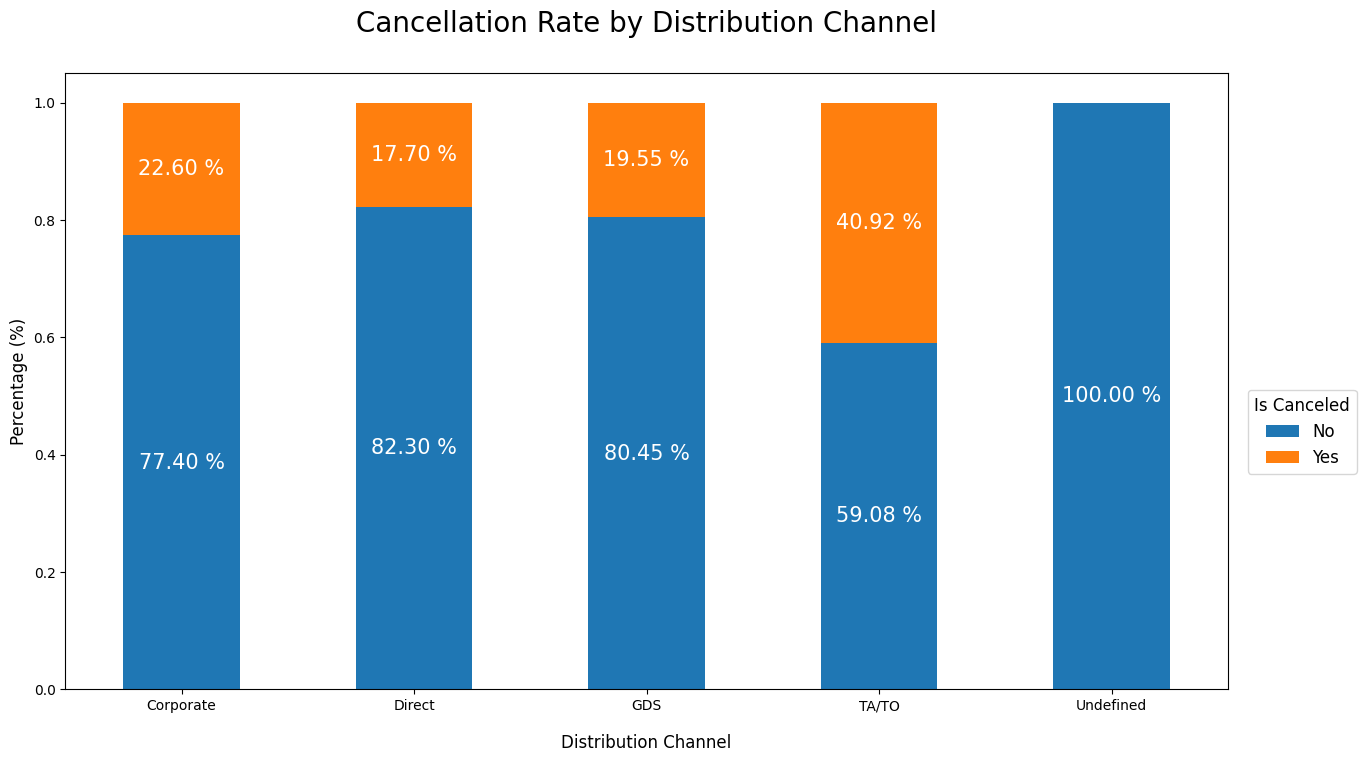

In [66]:
distribution_ax = pd.crosstab(df1['distribution_channel'], df1['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])

j = 1   
for p in distribution_ax.patches:
      if j != 10:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        distribution_ax.text(x+width/2, 
                y+height/2, 
                '{:.2f} %'.format(height*100), 
                horizontalalignment='center', 
                verticalalignment='center',
                color='white', fontsize=15)
      j += 1
    
plt.title('Cancellation Rate by Distribution Channel', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Distribution Channel', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

<Axes: xlabel='distribution_channel', ylabel='count'>

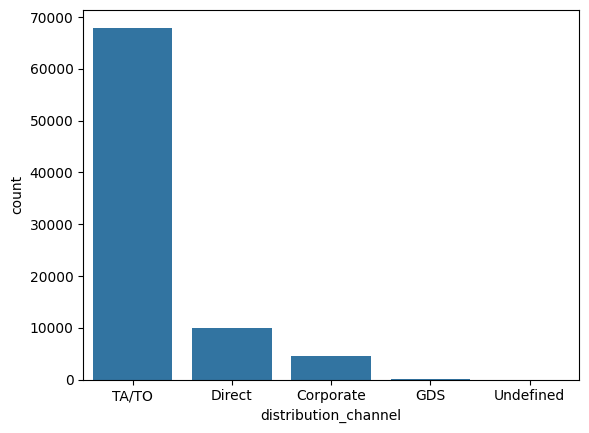

In [67]:
sns.barplot(x = df1['distribution_channel'].value_counts().index, y = df1['distribution_channel'].value_counts())

* The biggest cancellation rate is on the Travel Agent/Tour Operator distribution channel
* Distribution channel direct has the smallest cancellation rate
* For undefined we do not consider

## Agent and Cancellation

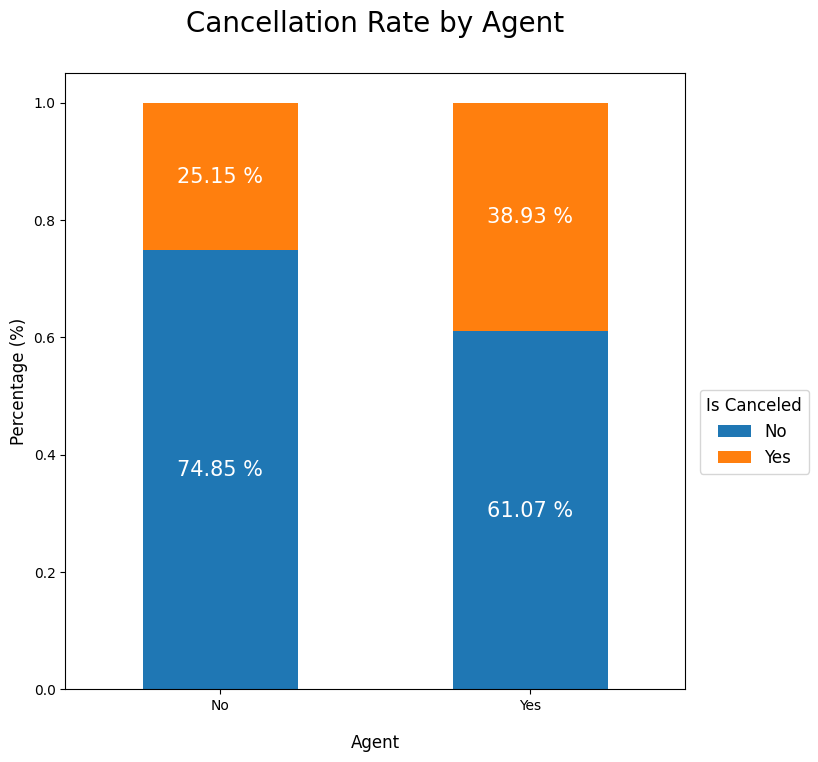

In [68]:
agent_ax = pd.crosstab(df1['agent'], df1['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
   
for p in agent_ax.patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      agent_ax.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
              color='white', fontsize=15)
    
plt.title('Cancellation Rate by Agent', fontsize=20, pad=30)    
agent_ax.set_xticklabels(['No', 'Yes'], rotation=360)
plt.xlabel('Agent', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

* Customers who make a booking through a travel agency are 38.93% likely to cancel. Higher than non-travel agencies

## Assigned Room Type and Cancellations

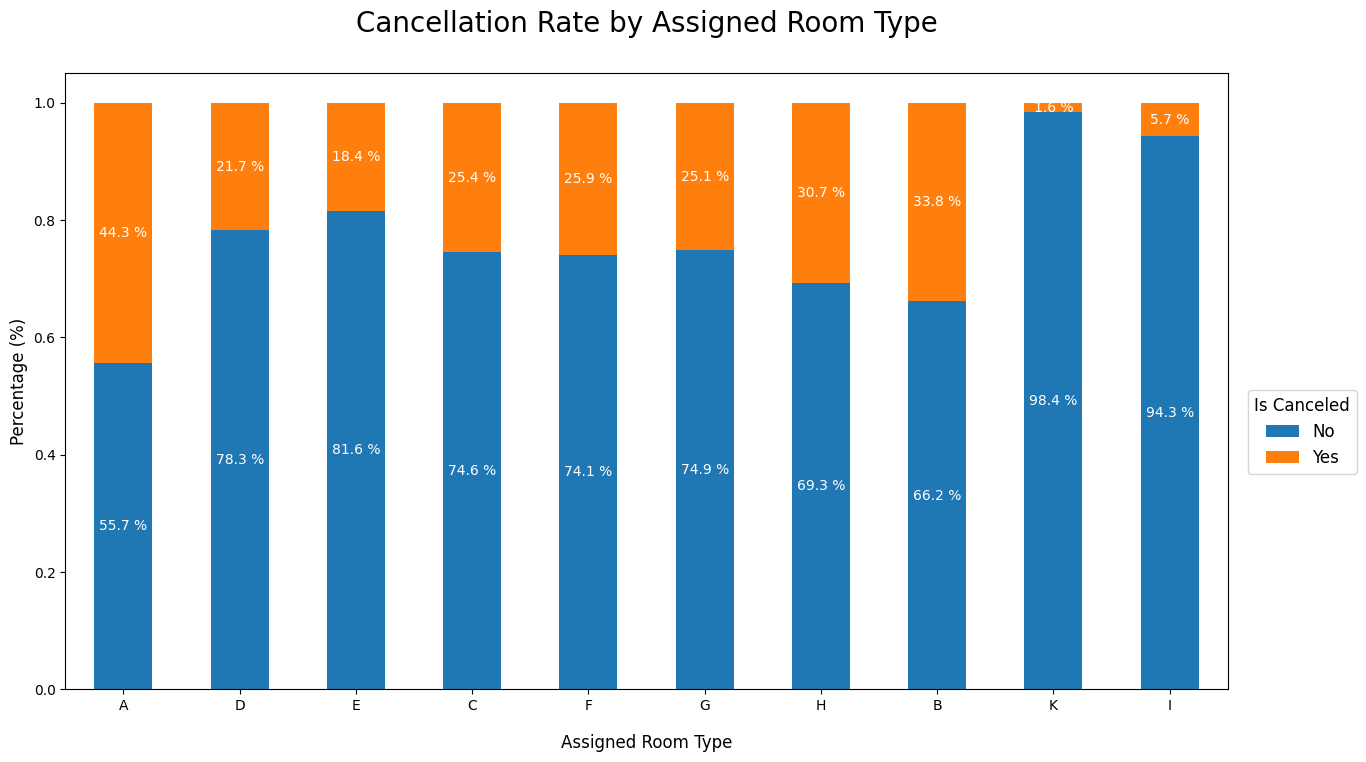

In [88]:
# Plotting
agent_ax = pd.crosstab(df1['assigned_room_type'], df1['is_canceled'], normalize='index').plot.bar(stacked=True, figsize=(15, 8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No', 'Yes'])

# Set lokasi sumbu x secara eksplisit
agent_ax.set_xticks(range(len(df1['assigned_room_type'].unique())))

for p in agent_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    agent_ax.text(x + width / 2,
                  y + height / 2,
                  '{:.1f} %'.format(height * 100),
                  horizontalalignment='center',
                  verticalalignment='center',
                  color='white', fontsize=10)

plt.title('Cancellation Rate by Assigned Room Type', fontsize=20, pad=30)
agent_ax.set_xticklabels(df1['assigned_room_type'].unique(), rotation=360)  # Atur label sesuai dengan data aktual
plt.xlabel('Assigned Room Type', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

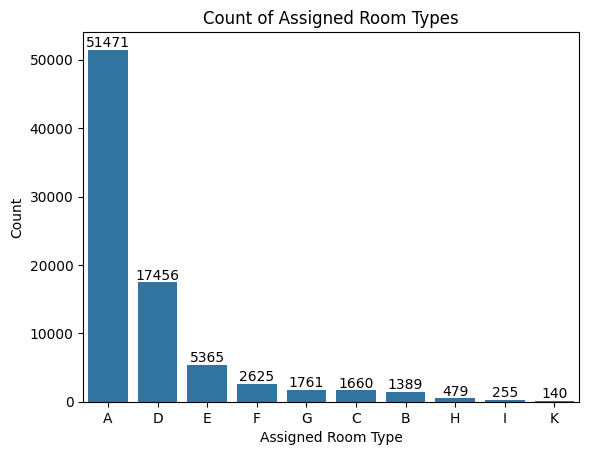

In [98]:
# Buat bar plot
sns.barplot(x=df1['assigned_room_type'].value_counts().index, y=df1['assigned_room_type'].value_counts())

# Anotasi pada setiap bar
for index, value in enumerate(df1['assigned_room_type'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Atur label dan judul
plt.xlabel('Assigned Room Type')
plt.ylabel('Count')
plt.title('Count of Assigned Room Types')

# Tampilkan plot
plt.show()

The varying cancellation rates among different Reserved Room Types and assigned room types suggest that factors other than room type may have a significant influence on cancellation decisions. The highest cancellation rates are seen in certain room types, such as Room Type A, while Room Types K and I have low cancellation rates, but with a limited number of bookings.

## Reserved Room Type and Cancellations

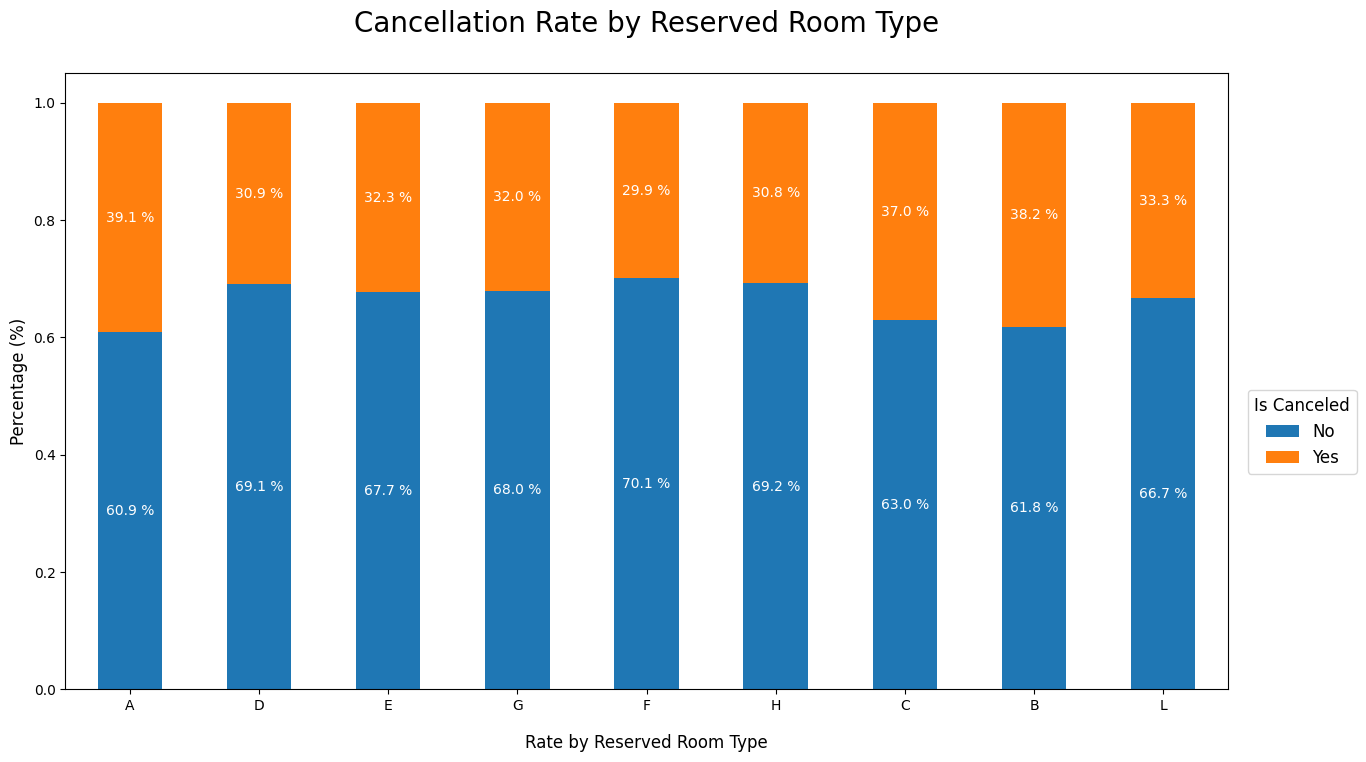

In [97]:
# Plotting
agent_ax = pd.crosstab(df1['reserved_room_type'], df1['is_canceled'], normalize='index').plot.bar(stacked=True, figsize=(15, 8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No', 'Yes'])

# Set lokasi sumbu x secara eksplisit
agent_ax.set_xticks(range(len(df1['reserved_room_type'].unique())))

for p in agent_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    agent_ax.text(x + width / 2,
                  y + height / 2,
                  '{:.1f} %'.format(height * 100),
                  horizontalalignment='center',
                  verticalalignment='center',
                  color='white', fontsize=10)

plt.title('Cancellation Rate by Reserved Room Type', fontsize=20, pad=30)
agent_ax.set_xticklabels(df1['reserved_room_type'].unique(), rotation=360)  # Atur label sesuai dengan data aktual
plt.xlabel('Rate by Reserved Room Type', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

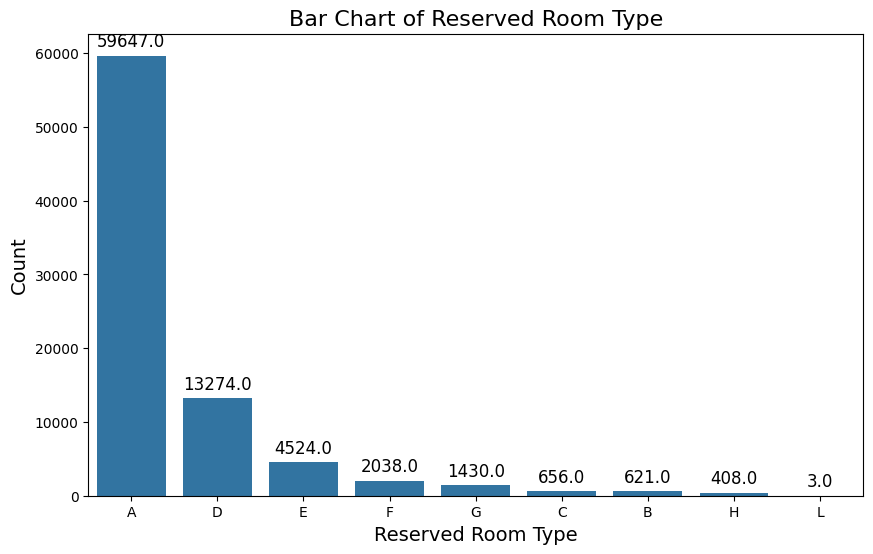

In [95]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df1['reserved_room_type'].value_counts().index, y=df1['reserved_room_type'].value_counts())

# Menambahkan anotasi pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.title('Bar Chart of Reserved Room Type', fontsize=16)
plt.xlabel('Reserved Room Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

While there is significant variation in cancellation rates between different Reserved Room Types, there is no consistent pattern indicating that Reserved Room Type is directly the main determinant in cancellation decisions.

In [ ]:
df1.to_csv(PATH_DATA_CLEAN+'train_clean2.csv',index = False)

# Kesimpulan EDA

1. Lead Time and Cancellation: Longer lead times are associated with higher cancellation rates, perhaps because customers have more time to consider and plan their trip.
2. Deposit Type and Cancellation: Bookings with non-refundable deposits have the highest cancellation rates, suggesting that deposit policies may influence cancellation decisions.
3. Previous Cancellations and Cancellation: Previous cancellation history significantly increases the likelihood of future cancellations.
4. Guest Location and Cancellation: Local guests tend to have a higher cancellation rate than international guests, perhaps because local travel considerations are more flexible.
5. Repeated Guest and Cancellation: Repeat guests are less likely to cancel a booking.
6. Market Segment and Customer Type: Certain market segments and customer types have higher cancellation rates, demonstrating the importance of understanding customer profiles to manage cancellation risk.
7. Booking Changes and Cancellation: Customers who make changes to booking details have lower cancellation rates.
8. Special Request and Cancellation: Customers who request special requests have a lower cancellation rate.
9. Parking Space and Meal Type: Parking requests and meal types can influence cancellation decisions.
10. Distribution Channel and Cancellation: Certain distribution channels have higher cancellation rates, which may reflect the policies or characteristics of ordering through those channels.
11. Assigned Room Type and Reserved Room Type: Certain room types have different cancellation rates, indicating variations in preferences or room characteristics that may influence cancellation decisions.